In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, st_tests, text2features, feature_analysis
import pandas as pd
import glob
import os
import re
import numpy as np
from scipy import stats

In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/201902 Stylistics/publication/data/"

# Getting Data

In [3]:
corde_freq_df = pd.read_parquet(wdir + "corde_comp_low_7000.pqt")
corde_freq_df.shape

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(34152, 7000)

In [4]:
corde_freq_df.head()

token         de      se     una   para      la        ,      en      el  \
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0          2.0  2.0  13.0       0.0   
abajo     1310.0   933.0   ...         1.0          3.0  0.0   0.0       0.0   

token      nº  pétalos  bsol  pereza  huellas  
aazorin   0.0      0.0   0.0     0.0      0.0  
abacca    0.0      0.0   0.0     0.0      0.0  
abaddon   1.0      0.0   0.0     0.0      0.0  
abadengo  0.0      0.0   0.0     0.0      0.0  
abajo     0.0      0.0   0.0     0.0      0.0  

[5 rows x 7000 columns]

In [5]:
corde_metadatos_df = pd.read_csv(wdir + "corde_comp_metadatos.csv", sep = "\t", index_col = 0)
corde_metadatos_df.shape

(34155, 17)

In [6]:
corde_metadatos_df.index = corde_metadatos_df["archivo"]

In [7]:
corde_metadatos_df.head()

archivo  \
archivo                          
defunsio              defunsio   
docramirsub139  docramirsub139   
rosagentsub25    rosagentsub25   
noticiersub11    noticiersub11   
heclesia              heclesia   

                                                           titulo  \
archivo                                                             
defunsio                      Defunsión de don Enrique de Villena   
docramirsub139  Concesión del derecho de usufructo de una casa...   
rosagentsub25   Romance [Rosa gentil. Tercera parte de romance...   
noticiersub11   Sin título [El Noticiero Universal. Diario ind...   
heclesia        Historia eclesiástica de España. Tomo I: El cr...   

                                                         autor    pais  \
archivo                                                                  
defunsio        Marqués de Santillana (Íñigo López de Mendoza)  España   
docramirsub139                                         Anónimo  España   
rosagentsub25                                          Anónimo  España   
noticiersub11                                          Anónimo  España   
heclesia                              García Villada, Zacarías  España   

               fechacre                                     tema   medio  \
archivo                                                                    
defunsio           1434           Verso lírico culto: Individual   Libro   
docramirsub139     1094           Derecho: Documentos notariales   Libro   
rosagentsub25      1573  Verso lírico culto: En obras colectivas   Libro   
noticiersub11      1899                                   Prensa  Prensa   
heclesia           1929                          Religión: Otros   Libro   

                formas  tokens  types  prim_fecha  siglo continente  \
archivo                                                               
defunsio          1205    1404    680        1434     15     Europa   
docramirsub139     382     409    218        1094     11     Europa   
rosagentsub25      351     388    203        1573     16     Europa   
noticiersub11       73      84     56        1899     19     Europa   
heclesia        266259  323574  29245        1929     20     Europa   

               matiz_fecha           prim_tema            secund_tema abs_tema  
archivo                                                                         
defunsio               NaN  Verso lírico culto             Individual    Verso  
docramirsub139         NaN             Derecho  Documentos notariales  Técnico  
rosagentsub25          NaN  Verso lírico culto    En obras colectivas    Verso  
noticiersub11          NaN              Prensa                 Prensa  Técnico  
heclesia               NaN            Religión                  Otros  Técnico

# Cleaning Data

In [8]:
documents_over_100_tokens_lt = list(corde_freq_df.sum(axis=1)[corde_freq_df.sum(axis=1) > 100].index)

In [9]:
len(documents_over_100_tokens_lt)

29867

In [10]:
corde_metadatos_long_doctuments_df = corde_metadatos_df.loc[documents_over_100_tokens_lt]

In [11]:
corde_metadatos_modern_df = corde_metadatos_long_doctuments_df.loc[corde_metadatos_long_doctuments_df["siglo"]>15].dropna(subset=["prim_tema"])

In [12]:
corde_modern_freq_df = corde_freq_df.loc[corde_metadatos_modern_df.index]

In [13]:
for text in corde_modern_freq_df.index.tolist():
    sum_ = corde_modern_freq_df.loc[text].sum()
    if sum_ > 1000 + corde_metadatos_modern_df.loc[text]["tokens"]:
        print(text)


cocina~1
floresta


In [14]:
corde_modern_freq_df = corde_modern_freq_df.drop(["cocina~1","floresta"])

In [15]:
corde_metadatos_modern_df = corde_metadatos_modern_df.drop(["cocina~1","floresta"])

In [16]:
corde_metadatos_modern_df.index.tolist() == corde_modern_freq_df.index.tolist()

True

In [17]:
corde_metadatos_modern_df.shape

(18709, 17)

In [18]:
corde_modern_freq_df.shape

(18709, 7000)

In [19]:
corde_modern_freq_df.sum().sum()

192404282.0

In [20]:
classes_lt = sorted(list(set(corde_metadatos_modern_df["prim_tema"])))

In [21]:
corde_metadatos_modern_df = pd.merge(corde_metadatos_modern_df,pd.get_dummies(corde_metadatos_modern_df[["prim_tema"]], prefix="", prefix_sep=""), left_index =True, right_index=True)

In [22]:
corde_metadatos_modern_df

archivo  \
archivo                        
aazorin              aazorin   
abacca                abacca   
abaddon              abaddon   
abadengo            abadengo   
abajo                  abajo   
abate                  abate   
abc1974sub10    abc1974sub10   
abc1974sub100  abc1974sub100   
abc1974sub101  abc1974sub101   
abc1974sub103  abc1974sub103   
abc1974sub104  abc1974sub104   
abc1974sub105  abc1974sub105   
abc1974sub106  abc1974sub106   
abc1974sub108  abc1974sub108   
abc1974sub11    abc1974sub11   
abc1974sub110  abc1974sub110   
abc1974sub111  abc1974sub111   
abc1974sub112  abc1974sub112   
abc1974sub113  abc1974sub113   
abc1974sub114  abc1974sub114   
abc1974sub115  abc1974sub115   
abc1974sub116  abc1974sub116   
abc1974sub117  abc1974sub117   
abc1974sub12    abc1974sub12   
abc1974sub126  abc1974sub126   
abc1974sub129  abc1974sub129   
abc1974sub13    abc1974sub13   
abc1974sub130  abc1974sub130   
abc1974sub131  abc1974sub131   
abc1974sub132  abc1974sub132   
...                      ...   
zoologiasub18  zoologiasub18   
zoologiasub19  zoologiasub19   
zoologiasub2    zoologiasub2   
zoologiasub20  zoologiasub20   
zoologiasub21  zoologiasub21   
zoologiasub22  zoologiasub22   
zoologiasub23  zoologiasub23   
zoologiasub24  zoologiasub24   
zoologiasub25  zoologiasub25   
zoologiasub26  zoologiasub26   
zoologiasub27  zoologiasub27   
zoologiasub28  zoologiasub28   
zoologiasub29  zoologiasub29   
zoologiasub3    zoologiasub3   
zoologiasub30  zoologiasub30   
zoologiasub4    zoologiasub4   
zoologiasub5    zoologiasub5   
zoologiasub6    zoologiasub6   
zoologiasub7    zoologiasub7   
zoologiasub8    zoologiasub8   
zoologiasub9    zoologiasub9   
zorri2                zorri2   
zorrilla            zorrilla   
zorrleye            zorrleye   
zorroarr            zorroarr   
zozaya                zozaya   
zozobra              zozobra   
zumalaca            zumalaca   
zuniga                zuniga   
zunzuneg            zunzuneg   

                                                          titulo  \
archivo                                                            
aazorin                                           Antonio Azorín   
abacca                                    Invitación a filosofar   
abaddon                                  Abaddón el exterminador   
abadengo       El Abadengo de Sahagún. Contribución al estudi...   
abajo                                               Los de abajo   
abate                      Cartas a su hermano don Carlos Andrés   
abc1974sub10            Yanguas Messía [ABC, 4 de julio de 1974]   
abc1974sub100  Elección para cubrir concejalías vacantes [ABC...   
abc1974sub101  Se hacen efectivos los despidos de Elsa [ABC, ...   
abc1974sub103   Pleno del Ayuntamiento [ABC, 4 de julio de 1974]   
abc1974sub104  Hasta el momento las Torres de Colón han costa...   
abc1974sub105  El señor Ledesma López juró su cargo de concej...   
abc1974sub106  Ocho grupos premiados en la VIII campaña de "M...   
abc1974sub108  El teniente general Alonso [ABC, 4 de julio de...   
abc1974sub11   Protesta española por las restricciones a la e...   
abc1974sub110  Distinciones del sindicato de hostelería a los...   
abc1974sub111  Homenaje del Instituto de Actuarios Españoles ...   
abc1974sub112  Almuerzo de homenaje al marqués de Valdeiglesi...   
abc1974sub113  Congreso internacional del Centro Europeo de D...   
abc1974sub114  Los taxistas, contra la concesión de licencias...   
abc1974sub115    Mentidero de la Villa [ABC, 4 de julio de 1974]   
abc1974sub116  Los cuadros del Museo del Prado, muy deteriora...   
abc1974sub117  Abastecimiento de aguas a los pueblos de la Si...   
abc1974sub12   Nixon regresa a Washington sin resultados espe...   
abc1974sub126  "Tachero", de Fernando G. Delgado [ABC, 4 de j...   
abc1974sub129            Rafael Flórez [ABC, 4 de julio de 1974]   
abc1974sub13   Nixon regresa a Washington sin resultados espe...   
abc1974sub130    Escaparate de l

In [23]:
classes_lt

['Artes y espectáculos',
 'Ciencias aplicadas',
 'Ciencias exactas, físicas y naturales',
 'Ciencias sociales y humanidades',
 'Derecho',
 'Historia y documentos',
 'Prensa',
 'Prosa',
 'Prosa didáctica',
 'Prosa dramática',
 'Prosa dramática breve',
 'Prosa dramática extensa',
 'Prosa lírica',
 'Prosa narrativa breve',
 'Prosa narrativa extensa',
 'Religión',
 'Sociedad',
 'Verso dramático',
 'Verso dramático breve',
 'Verso dramático extenso',
 'Verso lírico culto',
 'Verso lírico tradicional',
 'Verso narrativo culto',
 'Verso narrativo tradicional']

In [24]:
len(classes_lt)

24

# Classification and Evaluation of Parameters

In [21]:
results_lr_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["LR"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["log","tfidf","zscores","binary"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)

cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 7000)
MFW 100
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['logares', 'marco', 'espero']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.92427126213925, pvalue=3.3946235583217284e-48)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.817
rec         0.826
prec        0.809
f1_macro    0.814
f1_micro    0.814
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31699999999999995
MFW 1000
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['tributo', 'inconvenientes', 'fruta']
method used:	 LR
(1

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.03659265821271, pvalue=4.187373012521815e-31)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.724
rec         0.573
prec        0.987
f1_macro    0.772
f1_micro    0.783
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.22399999999999998
MFW 2000
The three first MFWs:  [',', 'a', ';']
The three last MFWs:  ['dulce', 'fuerzas', 'plaza']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1082,) (1082, 1993) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1082,) (1082, 1992) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=78.48094987592198, pvalue=3.4539950033088345e-53)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.849
rec         0.865
prec        0.835
f1_macro    0.845
f1_micro    0.846
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.349
MFW 3000
The three first MFWs:  ['a', ',', 'morauedis']
The three last MFWs:  ['religion', 'bocas', 'leña']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(

The three first MFWs:  ['de', 'esta', ':']
The three last MFWs:  ['estuviesen', 'glorias', 'volar']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3981) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3983) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3982) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3984) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3986) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=202.19450099553228, pvalue=2.9460312899715584e-73)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.973
rec   

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=83.64798908102482, pvalue=1.5535044123242958e-54)
Class:

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 1000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 999) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 999) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.58592504250572, pvalue=4.360733279477233e-36)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.733
rec         0.584
prec        0.994
f1_macro    0.780
f1_micro    0.790
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.23299999999999998
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.08035619086638, pvalue=5.704958923355917e-52)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.870
rec         0.889
prec        0.853
f1_macro    0.867
f1_micro    0.867
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.37
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2988) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=196.9969363177056, pvalue=1.0537880174554878e-72)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.970
rec         0.965
prec        0.976
f1_macro    0.970
f1_micro    0.970
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.47
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3982) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3990) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3985) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.733146855359976, pvalue=5.801651272389558e-35)
Class: 	 Ciencias aplicada

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 998) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 997) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.79427244901288, pvalue=1.2545768771305382e-43)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.922
rec         0.923
prec        0.925
f1_macro    0.922
f1_micro    0.922
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.42200000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (206,) (206, 1990) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1999)
u

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.967643582594064, pvalue=2.804501452148851e-43)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.907
rec         0.904
prec        0.914
f1_macro    0.908
f1_micro    0.909
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.40700000000000003
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3982) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3982) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3977) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3980) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3983) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.110302907986835, pvalue=7.340799823086083e-47)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.938
rec         0.933
prec        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.68498848555395, pvalue=2.70042885609158e-37)
Class: 	 Ciencias aplicadas


(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 998) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 999) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 998) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.574894285244994, pvalue=7.517316254059176e-41)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.902
rec         0.943
prec        0.870
f1_macro    0.897
f1_micro    0.898
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.402
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (206,) (206, 1991) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1999)
undersampling l

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.761557375195274, pvalue=6.128188947987189e-41)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.897
rec         0.891
prec        0.917
f1_macro    0.901
f1_micro    0.902
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.397
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
u

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3981) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3976) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3981) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3974) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3986) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.06987216673789, pvalue=7.591834594870476e-47)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.938
rec         0.935
prec        0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sa

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 99) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.99533063386776, pvalue=4.3822869693772014e-40)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.883
rec         0.871
prec        0.913
f1_macro    0.889
f1_micro    0.890
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.383
MFW 1000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 988) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 987) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross valida

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.42711594547472, pvalue=3.035372806072457e-46)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.926
rec         0.934
prec        0.922
f1_macro    0.925
f1_micro    0.925
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.42600000000000005
MFW 2000
The three first MFWs:  ['a', 'moraue

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1973) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1980) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1983) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1976) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1979) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=71.08291910658077, pvalue=4.238949728738977e-5

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sa

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 992) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 986) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.11752199007828, pvalue=9.425898156960116e-46)
Cla

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=59.18924248912179, pvalue=3.01746593025312e-47)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.942
rec         0.935
prec        0.957
f1_macro    0.944
f1_micro    0.945
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.44199999999999995
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 LR
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1978) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1978) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1990) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1980) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=64.16071251088367, pvalue=6.0926431842598446e-49)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.942
rec         0.944
prec        0.945
f1_macro    0.940
f1_micro    0.940
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.44199999999999995
MFW 3000
The three first MFWs:  ['de', 'más'

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.029370468147218, pvalue=0.00019441694417501)
Class: 	 Ciencias socia

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 LR
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.30268278382055, pvalue=1.4758753903232902e-42)
Clas

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 LR
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2991) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2991) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2985) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=60.43175985693073, pvalue=1.1050950662412545e-47)
Class: 	 Ciencias 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.4296583314961646, pvalue=0.0012348738105775225)
Class: 	 Ciencias soc

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.04763767330164, pvalue=3.4124225622618987e-26)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.634
rec         0.620
prec        0.651
f1_macro    0.651
f1_micro    0.653
dtype: float64
p-value:  0.0
Baseline: 		 0.52
LR
0.118
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 LR
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross va

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.82832990601991, pvalue=3.659138875277374e-48)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.857
rec         0.840
prec        0.876
f1_macro    0.864
f1_micro    0.864
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.34299999999999997
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 LR
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2990) lpc-max
cross val

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.11602086975983, pvalue=1.784087807133965e-42)
Class: 	 Derecho
Scores:
 	 f1          0.805
rec         0.821
prec    

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-9.551476374805057, pvalue=9.029452573198024e-13)
Class: 	 Derecho
Scores:
 	 f1          0.032
rec         0.016
prec        0.500
f1_macro    0.356
f1_micro    0.519
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
-0.479
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1997) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) l

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=62.95441590145309, pvalue=1.5274437865561076e-48)
Class: 	 Derecho
Scores:
 	 f1          0.866
rec         0.874
prec        0.860
f1_macro    0.861
f1_micro    0.861
dtype: float64
p-value:  0.0
Baseline: 		 0.52
LR
0.35
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (10

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4977) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4978) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4972) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4966) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=95.12067159535646, pvalue=2.96905968200079e-57)
Class: 	 Derecho
Scores:
 	 f1          0.925
rec         0.939
prec        0.912
f1_macro    0.922
f1_micro    0.922
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.41400000000000003
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.453251151809546, pvalue=2.894970168953987e-41)
Class: 	 Derecho
Scores:
 	 f1          0.761
rec         0.768
prec   

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-9.312288639496135, pvalue=2.029221204855448e-12)
Class: 	 Derecho
Scores:
 	 f1          0.672
rec         1.000
prec        0.506
f1_macro    0.348
f1_micro    0.509
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16900000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1989) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1998) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1996) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.66470698168693, pvalue=4.639658253294904e-47)
Class: 	 Derecho
Scores:
 	 f1          0.844
rec         0.846
prec        0.845
f1_macro    0.835
f1_micro    0.836
dtype: float64
p-value:  0.0
Baseline: 		 0.53
LR
0.31899999999999995
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
un

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4969) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4973) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4969) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4970) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=114.48657749647747, pvalue=3.519908824943599e-61)
Class: 	 Derecho
Scores:
 	 f1          0.915
rec         0.928
prec        0.904
f1_macro    0.908
f1_micro    0.909
dtype: float64
p-value:  0.0
Baseline: 		 0.53
LR
0.386


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 14405, '1': 4306})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  4306
L

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.9731951354221, pvalue=2.580148630541825e-36)
Cla

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.139533411115687, pvalue=0.03739924730209724)
Class: 	 Historia y documentos
Scores:
 	 f1          0.675
rec         1.000
prec        0.509
f1_macro    0.341
f1_micro    0.510
dtype: float64
p-value:  0.0374
Baseline: 		 0.51
LR
0.16700000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.427153738230317, pvalue=2.164111743140629e-31)
Class: 	 Historia y documentos
Scores:
 	 f1          0.716
rec         0.759
prec        0.678
f1_macro    0.694
f1_micro    0.696
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.20999999999999996
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Historia

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2986) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2988) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.58632737069668, pvalue=4.898269448303479e-50)
Class: 	 Historia y documentos
Scores:
 	 f1          0.850
rec         0.841
prec        0.864
f1_macro    0.850
f1_micro    0.850
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.34199999999999997
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3990) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3992) lpc-max
cross validation sampling of  Historia y do

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.88166295437711, pvalue=1.9942500649666057e-34)
C

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 994) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 993) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.003573349401846, pvalue=0.3205146690248729)
Class: 	 Historia y documentos
Scores:
 	 f1          0.673
rec         0.998
prec        0.508
f1_macro    0.362
f1_micro    0.514
dtype: float64
p-value:  0.3205
Baseline: 		 0.5
LR
0.17100000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.64522691099886, pvalue=1.2649895984202344e-33)
Class: 	 Historia y documentos
Scores:
 	 f1          0.734
rec         0.754
prec        0.717
f1_macro    0.713
f1_micro    0.715
dtype: float64
p-value:  0.0
Baseline: 		 0.52
LR
0.21099999999999997
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Historia

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2985) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.21339497295408, pvalue=1.4363652377347632e-52)
Class: 	 Historia y documentos
Scores:
 	 f1          0.876
rec         0.876
prec        0.879
f1_macro    0.874
f1_micro    0.874
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.369
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3976) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3975) lpc-max
cross validation sampling of  Historia y documentos
(187

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.02067184195507, pvalue=1.385665352326638e-40)
Class: 	 Prensa
Scores:
 	 f1          0.789
rec         0.794
prec        0.

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1982) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1994) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1980) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=103.5202305139558, pvalue=4.792975051409928e-59)
Class: 	 Prensa
Scores:
 	 f1          0.676
rec         1.000
prec        0.510
f1_macro    0.346
f1_micro    0.512
dtype: float64
p-value:  0.0

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.137566157009164, pvalue=1.3209330910774887e-32)
Class: 	 Prensa
Scores:
 	 f1          0.722
rec         0.649
prec        0.822
f1_macro    0.741
f1_micro    0.744
dtype: float64
p-value:  0.0
Baseline: 		 0.52
LR
0.20599999999999996
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
under

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4948) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4965) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=106.67670604933451, pvalue=1.1071330555056002e-59)
Class: 	 Prensa
Scores:
 	 f1          0.912
rec         0.932
prec        0.895
f1_macro    0.910
f1_micro    0.910
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.41100000000000003
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.39327941971742, pvalue=3.7437580664239753e-42)
Class: 	 Prensa
Scores:
 	 f1          0.789
rec         0.798
prec        0

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1990) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1989) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1987) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1994) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1986) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.693564066471871, pvalue=6.916094088634692e-07)
Class: 	 Prensa
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.353
f1_micro    0.545
dtype: float64
p-value:  0.

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.71759399857219, pvalue=2.588685164871854e-32)
Class: 	 Prensa
Scores:
 	 f1          0.714
rec         0.628
prec        0.836
f1_macro    0.737
f1_micro    0.739
dtype: float64
p-value:  0.0
Baseline: 		 0.52
LR
0.18999999999999995
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersa

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4959) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4961) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=93.5713216292762, pvalue=6.610251853524043e-57)
Class: 	 Prensa
Scores:
 	 f1          0.910
rec         0.932
prec        0.890
f1_macro    0.910
f1_micro    0.910
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.398


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 18691, '1': 20})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  20
Labels shape (18711,) 
 Data shape (18711, 6980)
size after culling data: (18711, 6980) (18711,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.21775477699897, pvalue=8.893162751201186e-11)
Class: 	 Prosa
Scores:
 	 f1          0.807
rec         0.850
prec        0.800
f1_macro    0.793
f1_mi

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1828) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1828) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1824) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1873) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1783) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.33030277982335, pvalue=1.409190521310507e-23)
Class: 	 Prosa
Scores:
 	 f1          0.733
rec         1.000
prec        0.583
f1_macro    0.533
f1_micro    0.625
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.232

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.529393205118451, pvalue=9.727761241464078e-13)
Class: 	 Prosa
Scores:
 	 f1          0.680
rec         1.000
prec        0.517
f1_macro    0.373
f1_micro    0.525
dtype: float64
p-value:  0.0
Base

typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.236581233113316, pvalue=2.855089185155741e-09)
Class: 	 Prosa
Scores:
 	 f1          0.753
rec         0.850
prec        0.717
f1_macro    0.720
f1_m

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1849) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1857) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1809) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1769) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1824) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.272739459661555, pvalue=1.6126013746730733e-23)
Class: 	 Prosa
Scores:
 	 f1          0.727
rec         1.000
prec        0.583
f1_macro    0.480
f1_micro    0.600
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.2

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.36363636363634, pvalue=1.4634758926039709e-25)
Class: 	 Prosa
Scores:
 	 f1          0.693
rec         1.000
prec        0.533
f1_macro    0.413
f1_micro    0.550
dtype: float64
p-value:  0.0
Bas

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.35372112534091, pvalue=6.011598463737743e-54)
Class: 	 Prosa didáctica
Scores:

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 999) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.86422056264087, pvalue=9.501309106125053e-53)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.823
rec         0.920
prec        0.746
f1_macro    0.799
f1_micro    0.802
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.32299999999999995
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1996) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1994) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
undersa

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.73045157112011, pvalue=4.8015094131170576e-54)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.801
rec         0.894
prec        0.72

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=85.07311835464485, pvalue=6.826803645155703e-55)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.898
rec         0.897
prec        0.900
f1_macro    0.898
f1_micro    0.898
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.398
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 LR
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1130,) (1130, 4984) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 4995)
undersampling l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.7196357732716, pvalue=8.796179130097276e-54)
Class: 	 Prosa didáctica
Scores:


(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=72.77808207284795, pvalue=1.3500193925131712e-51)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.825
rec         0.906
prec        0.760
f1_macro    0.807
f1_micro    0.809
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.32499999999999996
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1996) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
under

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=69.22000529307567, pvalue=1.537949074358714e-50)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.772
rec         0.844
prec        0.714
f1_macro    0.749
f1_micro    0.752
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.272
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersamp

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3992) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3992) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=113.508283895338, pvalue=5.3515866873628195e-61)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.906
rec         0.910
prec        0.904
f1_macro    0.905
f1_micro    0.905
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.406
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 LR
(18711,)
(18711, 4995)
undersampling l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.062299564457938, pvalue=7.946742148475948e-19)
Class: 	 Prosa dramática
Scores:
 	 f1          0.8

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (40,) (40, 890) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.33299628858863, pvalue=3.734641226973471e-19)
Class: 	 Prosa dramática
Scores:
 	 f1          0.800
rec         0.900
prec        0.767
f1_macro    0.707
f1_micro    0.750
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30000000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1865) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1676) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1832) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
u

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.984239077665105, pvalue=2.019542122447593e-10)
Class: 	 Prosa dramática
Scores:
 	 f1          0.800
rec         0.750
prec        0.900
f1_macro    0.853
f1_micro    0.875
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30000000000000004
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
u

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 LR
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4798) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4179) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 3879) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4603) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.959390746481484, pvalue=3.8295939506481496e-16)
Class: 	 Prosa dramática
Scores:
 	 f1          0.860
rec         0.850
prec        0.933
f1_macro    0.867
f1_mi

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.246360390787533, pvalue=1.7191887499117794e-24)
Class: 	 Prosa dramática
Scores:
 	 f1          0.

undersampled (40,) (40, 870) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.01616064946961, pvalue=3.217395835951707e-16)
Class: 	 Prosa dramática
Scores:
 	 f1          0.800
rec         0.900
prec        0.783
f1_macro    0.747
f1_micro    0.775
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30000000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1809) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1724) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1779) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1887) lpc-max
cross va

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.80805478305016, pvalue=3.8155582419238996e-13)
Class: 	 Prosa dramática
Scores:
 	 f1          0.847
rec         0.800
prec        0.967
f1_macro    0.867
f1_micro    0.875
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.347
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling l

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 LR
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4481) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4624) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 3935) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4528) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4457) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.59987759699131, pvalue=1.2238147616510886e-20)
Class: 	 Prosa dramática
Scores:
 	 f1          0.830
rec         0.850
prec        0.867
f1_macro    0.803
f1_mic

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.67644841879709, pvalue=6.293030786172047e-35)
Class: 	 Prosa dramáti

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 965) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 972) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 973) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.135396335893336, pvalue=2.2090376722555357e-24)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.800
rec         0.780
prec        0.843
f1_macro    0.812
f1_micro    0.815
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30000000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (96,) (96, 1915) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711,

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.91932113852105, pvalue=3.862384954350931e-33)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.876
rec         0.830
prec        0.935
f1_macro    0.884
f1_micro    0.885
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.376
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3733) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3817) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3805) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3755) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3772) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.313639305230744, pvalue=4.688678744405995e-45)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.953
rec         0.980
prec

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.956377220835023, pvalue=2.71701675784505e-30)
Class: 	 Prosa dramáti

undersampled (96,) (96, 970) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 968) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 961) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 944) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.522904305262806, pvalue=2.210433191766162e-19)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.837
rec         0.810
prec        0.918
f1_macro    0.850
f1_micro    0.855
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.33699999999999997
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (96,)

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.762021760649617, pvalue=5.4404427088043795e-25)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.806
rec         0.765
prec        0.923
f1_macro    0.833
f1_micro    0.842
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30600000000000005
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(1

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.27952732464364, pvalue=3.4444109079792266e-46)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.971
rec         0.980
prec        0.967
f1_macro    0.970
f1_micro    0.970
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.471
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3719) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3872) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3784) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3799) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.568866382188055, pvalue=1.127535984159897e-42)
C

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 989) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 992) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 988) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 989) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.92481736813894, pvalue=7.8841995965792e-43)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.845
rec         0.969
prec        0.755
f1_macro    0.812
f1_micro    0.819
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.345
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.097787454595, pvalue=1.3681536595879455e-48)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.882
rec         0.967
prec        0.813
f1_macro    0.867
f1_micro    0.870
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.382
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (244,) (244, 3000) lpc-max
cross validation sampling of  Prosa dramática extensa
(

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2965) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2966) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=87.03207352180489, pvalue=2.2536079557428916e-55)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.957
rec         0.984
prec        0.933
f1_macro    0.955
f1_micro    0.955
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.45699999999999996
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3928) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3955) lpc-max
cross validation sampling of  Prosa dramáti

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.6972607601893, pvalue=5.689694750934307e-46)
Cla

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 987) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 986) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 984) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 985) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.240090014981156, pvalue=5.0111749852525817e-45)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.871
rec         0.983
prec        0.783
f1_macro    0.849
f1_micro    0.853
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.371
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(187

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.425455557951665, pvalue=3.6213922861362885e-42)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.931
rec         0.992
prec        0.879
f1_macro    0.925
f1_micro    0.925
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.43100000000000005
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (244,) (244, 3000) lpc-max
cross validation sampling of  Prosa dr

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2967) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2958) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=100.68293749489749, pvalue=1.859045570950979e-58)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.968
rec         0.983
prec        0.956
f1_macro    0.967
f1_micro    0.967
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46799999999999997
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3944) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3953) lpc-max
cross validation sampling of  Prosa dramáti

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.605934048743188, pvalue=9.414145760302569e-07)
Class: 	 Prosa lírica
Scores:
 	 f1          0.743
rec         0.85

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.51281532830256, pvalue=3.783328528446025e-18)
Class: 	 Prosa lírica
Scores:
 	 f1          0.747
rec         1.000
prec        0.617
f1_macro    0.507
f1_micro    0.625
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.247
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1653) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1873) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1836) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1631) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1791)

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.921437626518383, pvalue=2.613981260499071e-13)
Class: 	 Prosa lírica
Scores:
 	 f1          0.853
rec         1.000
prec        0.767
f1_macro    0.760
f1_micro    0.800
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.353
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersam

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 LR
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3870) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4524) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4485) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4440) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4332) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.4391597479431395, pvalue=1.6891693620945665e-06)
Class: 	 Prosa lírica
Scores:
 	 f1          0.780
rec         0.800
prec        0.817
f1_macro    0.787
f1_micro    0.825
dtype

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.047196010214191, pvalue=5.606205839066401e-09)
Class: 	 Prosa lírica
Scores:
 	 f1          0.827
rec         0.90

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1751) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1702) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1686) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1770) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1747) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.143864028404145, pvalue=6.323670556219488e-19)
Class: 	 Prosa lírica
Scores:
 	 f1          0.667
rec         1.000
prec        0.500
f1_macro    0.333
f1_micro    0.500
dtype: floa

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.641685488655867, pvalue=2.4528178752442662e-14)
Class: 	 Prosa lírica
Scores:
 	 f1          0.667
rec         1.000
prec        0.500
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16700000000000004
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling 

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4303) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4330) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4202) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4296) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.993006909748362, pvalue=2.3992053907715765e-07)
Class: 	 Prosa lírica
Scores:
 	 f1          0.783
rec         0.800
prec        0.800
f1_macro    0.777
f1_micro    0.800
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.28300000000000003


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 18286, '1': 425})
All your class values had more than 10 examples. Congrats :)
Least popupated 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.02052598761541, pvalue=2.6627895856099918e-43)
Class: 	 Pr

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 994) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.18985962023144, pvalue=1.6549954275883867e-42)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.798
rec         0.779
prec        0.823
f1_macro    0.803
f1_micro    0.803
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.29800000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.87241946635602, pvalue=1.1634803899935932e-43)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.815
rec         0.833
prec        0.800
f1_macro    0.811
f1_micro    0.812
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31499999999999995
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (850,) (850, 3000) lpc-max
cross validation sampling of  Prosa narrativa b

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (850,) (850, 2980) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=105.6649114735043, pvalue=1.7625466323231285e-59)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.907
rec         0.913
prec        0.902
f1_macro    0.906
f1_micro    0.906
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.40700000000000003
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3988) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3987) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3978) lpc-max
cross validation sampling of  Prosa narrativa breve

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.72367661436137, pvalue=9.647596996788264e-43)
Class: 	 Pro

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 999) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 997) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.608977827232, pvalue=2.5986679592604635e-46)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.801
rec         0.785
prec        0.825
f1_macro    0.806
f1_micro    0.807
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30100000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.81425047856316, pvalue=8.808487053142397e-43)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.845
rec         0.868
prec        0.827
f1_macro    0.840
f1_micro    0.841
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.345
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (850,) (850, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (850,) (850, 2988) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=91.41213573657788, pvalue=2.0618160398540905e-56)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.921
rec         0.927
prec        0.919
f1_macro    0.921
f1_micro    0.921
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.42100000000000004
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3978) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3981) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3980) lpc-max
cross validation sampling of  Prosa narrativa breve

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=97.66241495418035, pvalue=8.2097701127809

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 999) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=84.33856689565731, pvalue=1.0411919799148067e-54)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.809
rec         0.874
prec        0.754
f1_macro    0.791
f1_micro    0.793
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30900000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method us

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=78.78722725618553, pvalue=2.858076704432874e-53)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.786
rec         0.838
prec        0.742
f1_macro    0.771
f1_micro    0.773
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.28600000000000003
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impi

undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2992) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2990) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=194.91107121614354, pvalue=1.7741707901909373e-72)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.957
rec         0.968
prec        0.947
f1_macro    0.956
f1_micro    0.956
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.45699999999999996
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
un

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=94.10068079663263, pvalue=5.0213358544180

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 998) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=85.4252114924711, pvalue=5.583450829064532e-55)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.814
rec         0.903
prec        0.742
f1_macro    0.790
f1_micro    0.793
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31399999999999995
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.36997298525678, pvalue=1.0864213311988392e-53)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.789
rec         0.853
prec        0.735
f1_macro    0.771
f1_micro    0.773
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.28900000000000003
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'imp

undersampled (1908,) (1908, 2997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2995) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2997) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=235.4029768640642, pvalue=1.7235535344821993e-76)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.957
rec         0.957
prec        0.959
f1_macro    0.958
f1_micro    0.958
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.45699999999999996
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
und

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.03476928430805, pvalue=5.429547191723176e-42)
Class: 	 Religión
Scores:
 	 f1          0.849
rec         0.853
prec        

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.09480931321686, pvalue=6.651905614727659e-43)
Class: 	 Religión
Scores:
 	 f1          0.885
rec         0.969
prec        0.817
f1_macro    0.868
f1_micro    0.871
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.385
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1999) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1998) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
c

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=66.67860724152654, pvalue=9.435225932027175e-50)
Class: 	 Religión
Scores:
 	 f1          0.934
rec         0.956
prec        0.918
f1_macro    0.932
f1_micro    0.932
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.43400000000000005
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
unders

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4985) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4983) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.97506967659031, pvalue=4.151772741852706e-54)
Class: 	 Religión
Scores:
 	 f1          0.942
rec         0.951
prec        0.937
f1_macro    0.941
f1_micro    0.941
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.44199999999999995
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.72590428243531, pvalue=3.557078732847896e-43)
Class: 	 Religión
Scores:
 	 f1          0.875
rec         0.901
prec        

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.984050767905394, pvalue=5.724028586871057e-42)
Class: 	 Religión
Scores:
 	 f1          0.891
rec         0.956
prec        0.842
f1_macro    0.878
f1_micro    0.881
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.391
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max


(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=70.98045600429948, pvalue=4.5463806617920265e-51)
Class: 	 Religión
Scores:
 	 f1          0.903
rec         0.958
prec        0.860
f1_macro    0.894
f1_micro    0.895
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.403
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,)

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4978) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4979) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.550206368113, pvalue=9.742724907382918e-54)
Class: 	 Religión
Scores:
 	 f1          0.951
rec         0.951
prec        0.958
f1_macro    0.951
f1_micro    0.951
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.45099999999999996


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 18402, '1': 309})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  309
Labels sh

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.63112677930652, pvalue=1.0589451285713994e-42)
Class: 	 Sociedad
Scores:
 	 f1          0.800
rec         0.803
prec       

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1996) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1997) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1992) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.57000627526785, pvalue=6.353622096108234e-46)
Class: 	 Sociedad
Scores:
 	 f1          0.835
rec         0.932
prec        0.759
f1_macro    0.812
f1_micro    0.815
dtype: float64
p-value:  0

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.54955981661033, pvalue=6.467445569302647e-46)
Class: 	 Sociedad
Scores:
 	 f1          0.818
rec         0.899
prec        0.751
f1_macro    0.797
f1_micro    0.799
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31799999999999995
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
unders

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4978) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4984) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.72422130240675, pvalue=5.558370397750273e-46)
Class: 	 Sociedad
Scores:
 	 f1          0.884
rec         0.893
prec        0.877
f1_macro    0.882
f1_micro    0.882
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.384
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.26063956250248, pvalue=3.6822206427939536e-38)
Class: 	 Sociedad
Scores:
 	 f1          0.794
rec         0.812
prec       

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=62.355618358552874, pvalue=2.425977732181519e-48)
Class: 	 Sociedad
Scores:
 	 f1          0.813
rec         0.897
prec        0.748
f1_macro    0.791
f1_micro    0.794
dtype: float64
p-value:  

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.73140664168037, pvalue=2.0007582877986327e-44)
Class: 	 Sociedad
Scores:
 	 f1          0.828
rec         0.906
prec        0.765
f1_macro    0.808
f1_micro    0.810
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.32799999999999996
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 LR
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
under

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4975) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4975) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=68.40651733676104, pvalue=2.7289084022879018e-50)
Class: 	 Sociedad
Scores:
 	 f1          0.895
rec         0.890
prec        0.903
f1_macro    0.896
f1_micro    0.897
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.395


analysed class:	 Verso dramático
* Culling data
labels done
Counter({'0': 18710, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['pusoseme']
(18711,)
(18711, 6980)
Counter({'0': 18710})
(18710, 6980) (18710,)
Least popupated class value:	  18710
Labels shape (18710,) 
 Data shape (18710, 697

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18710, 6973)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['obligados', 'dejan', 'determinado']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['guía', 'xviii', 'yerro']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['león', 'español', 'sera']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['grupo', 'leche', 'vii']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['yugo

textual representation:  zscores
Columns that are empty:  []
(18710, 6973)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['cantando', 'à', 'impide']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs

(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=136.51036946948716, pvalue=6.515091792480315e-65)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.966
rec         0.968
prec        0.964
f1_macro    0.965
f1_micro    0.965
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46599999999999997
MFW 5000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 LR
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=89.02508932223606, pvalue=7.482142028380478e-56)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.892
rec         0.945
prec        0.846
f1_macro    0.884
f1_micro    0.884
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.392
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(1871

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 992) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 989) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 995) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 995) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=92.99003446553638, pvalue=8.955737292744309e-57)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.921
rec         0.920
pr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=73.62157956546879, pvalue=7.714309328673188e-52)
Class: 	 Ver

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 989) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 996) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=75.21471778661545, pvalue=2.726640137991924e-52)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.871
rec         0.891
prec        0.854
f1_macro    0.868
f1_micro    0.868
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.371
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
un

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=91.26134300761086, pvalue=2.2345073886059735e-56)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.863
rec         0.868
prec        0.858
f1_macro    0.862
f1_micro    0.862
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.363
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=143.39101141205992, pvalue=5.888780283430817e-66)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.949
rec         0.950
prec        0.950
f1_macro    0.949
f1_micro    0.949
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.44899999999999995
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3974) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3979) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3980) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3967) lpc-max
cross validation sampling of  Verso dramático breve

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=84.86529179341534, pvalue=7.689946814705734e-55)
Cl

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 993) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 997) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 997) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 992) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=95.29478122267415, pvalue=2.715862657574512e-57)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.861
rec         0.915
prec        0.814
f1_macro    0.852
f1_micro    0.853
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.361
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=89.67146444999237, pvalue=5.260128591694051e-56)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.920
rec         0.953
prec        0.889
f1_macro    0.917
f1_micro    0.917
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.42000000000000004
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dram

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2988) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2983) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=165.18002519309314, pvalue=5.831687358409068e-69)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.962
rec         0.978
prec        0.948
f1_macro    0.961
f1_micro    0.961
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46199999999999997
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3975) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3969) lpc-max
cross validation sampling of  Verso dramáti

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.12054598228222, pvalue=1.5240286355444045e-52)
C

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 999) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 995) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=68.41468240635477, pvalue=2.713156581888515e-50)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.882
rec         0.925
prec        0.844
f1_macro    0.874
f1_micro    0.874
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.382
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.04627439719398, pvalue=1.3220384149777901e-53)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.890
rec         0.920
prec        0.863
f1_macro    0.885
f1_micro    0.886
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.39
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático extenso


(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2986) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2988) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=192.73276404610948, pvalue=3.0750836682782574e-72)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.965
rec         0.975
prec        0.956
f1_macro    0.964
f1_micro    0.964
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46499999999999997
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3981) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3974) lpc-max
cross validation sampling of  Verso dramát

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.1935883725003, pvalue=3.708075773954908e-46)
Class: 	 Verso lír

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-9.272719580619848, pvalue=2.3215096187272516e-12)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.055
rec         0.028
prec        0.900
f1_macro    0.366
f1_micro    0.518
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
-0.449
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
unders

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=69.16111209543773, pvalue=1.602785413583912e-50)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.850
rec         0.824
prec        0.878
f1_macro    0.851
f1_micro    0.851
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.33799999999999997
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(1

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=125.07082379001788, pvalue=4.6898663614562763e-63)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.935
rec         0.951
prec        0.921
f1_macro    0.935
f1_micro    0.935
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.42800000000000005
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3982) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3978) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3980) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3981) lpc-max
cross validation sampling of  Verso lírico culto
(187

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.26788718541451, pvalue=3.085479535268769e-44)
Class: 	 Verso lí

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 993) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.785300478985155, pvalue=0.43605817105927014)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.340
f1_micro    0.515
dtype: float64
p-value:  0.4361
Baseline: 		 0.52
LR
-0.515
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
under

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.83763379569424, pvalue=2.1390908644860206e-46)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.862
rec         0.820
prec        0.909
f1_macro    0.869
f1_micro    0.870
dtype: float64
p-value:  0.0
Baseline: 		 0.51
LR
0.356
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3972) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3987) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3985) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3987) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3983) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=140.8747875820514, pvalue=1.3991863288340377e-65)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.950
rec         0.955
pr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=64.68165500682852, pvalue=4.11802718

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 993) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.326266852881297, pvalue=1.5864145457494533e-25)
Class: 	 Verso lírico tradicional
Scores:
 	 f1         

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 LR
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=87.97720344670098, pvalue=1.3318675265744744e-55)
Class: 	 Verso lírico tradicional
Score

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 LR
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2987) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2987) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2975) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2989) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2984) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=133.22090741760783, pvalue=2.145963927377718e-64)
Class: 	 Verso lírico tradicional
Scores:
 	 f1      

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.08287234003721, pvalue=5.69555450

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.279189156105208, pvalue=1.58839707442529e-23)
Class: 	 Verso lírico tradicional
Scores:
 	 f1          0

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 LR
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=71.18169465400946, pvalue=3.962650418103065e-51)
Class: 	 Verso lírico tradicional
Scores

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 LR
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2987) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2981) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2987) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2988) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=151.0991934075387, pvalue=4.552194608938574e-67)
Class: 	 Verso lírico tradicional
Scores:
 	 f1       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.549828925609557, pvalue=1.0631510389753596e-21)
Class: 	 V

undersampled (200,) (200, 985) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 991) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 986) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 990) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.69536236723361, pvalue=2.6232612505627296e-34)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.729
rec         1.000
prec        0.576
f1_macro    0.553
f1_micro    0.625
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.22899999999999998
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersampl

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.606118220623756, pvalue=1.1069702578810132e-36)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.842
rec         0.920
prec        0.781
f1_macro    0.822
f1_micro    0.825
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.34199999999999997
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.822718577381792, pvalue=2.174610628646529e-34)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.859
rec         0.840
prec        0.895
f1_macro    0.864
f1_micro    0.865
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.359
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3946) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3938) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3938) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3940) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(187

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.145236293336456, pvalue=4.929057453158769e-28)
Class: 	 Ve

undersampled (200,) (200, 992) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 986) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 995) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 986) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=40.61262891956255, pvalue=2.160952742229088e-39)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.798
rec         0.990
prec        0.672
f1_macro    0.724
f1_micro    0.745
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.29800000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 LR
(18711,)
(18711, 1999)
undersampling lpc-max
undersample

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.97844401925004, pvalue=1.7305249696084348e-34)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.832
rec         0.930
prec        0.756
f1_macro    0.806
f1_micro    0.810
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.33199999999999996
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 LR
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo c

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.06503624936632, pvalue=7.494308080257698e-32)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.859
rec         0.840
prec        0.890
f1_macro    0.864
f1_micro    0.865
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.359
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 LR
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3947) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3938) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3944) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3949) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(1871

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.06351973763578, pvalue=1.373

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 986) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 988) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 992) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 993) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 988) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.500118192658675, pvalue=1.0911289400484957e-25)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 LR
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.344539269186374, pvalue=1.7876045572268524e-21)
Class: 	 Verso narrativo tradicio

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 LR
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2979) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2964) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2973) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2971) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2969) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.65619375155046, pvalue=3.916470951746087e-52)
Class: 	 Verso narrativo tradicional
Scores:
 	 f

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 LR
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.36638137618357, pvalue=4.079

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 LR
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 985) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 990) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 982) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 985) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 987) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.753127804942455, pvalue=1.5322623198385822e-28)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 LR
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.209771001281634, pvalue=3.131806153661682e-27)
Class: 	 Verso narrativo tradicion

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 LR
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2967) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2979) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2967) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2959) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2951) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=69.60127126890637, pvalue=1.1781596144855874e-50)
Class: 	 Verso narrativo tradicional
Scores:
 	 

In [23]:
results_lr_df.to_csv(wdir + "results_lr.tsv", sep="\t")

In [22]:
results_lr_df.shape

(1104, 19)

In [21]:
results_svc_log_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["SVC"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["log"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)

cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 7000)
MFW 100
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['logares', 'marco', 'espero']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=57.71771881345861, pvalue=1.0185022908833838e-46)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.832
rec         0.839
prec        0.828
f1_macro    0.831
f1_micro    0.832
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.33199999999999996
MFW 1000
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['tributo', 'inconvenientes', 'fruta']
method used:	 SVC


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=68.27938464631367, pvalue=2.9865669376947446e-50)
Class

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.883724983696833, pvalue=8.811989878885556e-34)
Class: 	 Ciencias aplicad

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.33079626797247, pvalue=1.596809505690998e-36)
Class: 	 Ciencias aplicada

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1s

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1s

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.77828326949076, pvalue=5.304272759754233e-46)
Class: 	 Derecho
Scores:
 	 f1          0.814
rec         0.825
prec   

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=62.43904171666137, pvalue=2.2739567381381092e-48)
Class: 	 Derecho
Scores:
 	 f1          0.810
rec         0.824
prec  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.91632507695321, pvalue=8.388749577764752e-34)
C

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.839831850449716, pvalue=2.1263782873078296e-32)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.55210279919323, pvalue=6.45317650759625e-46)
Class: 	 Prensa
Scores:
 	 f1          0.798
rec         0.813
prec        0.

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.38719836620483, pvalue=5.651689600675225e-50)
Class: 	 Prensa
Scores:
 	 f1          0.806
rec         0.820
prec        0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.607476635514021, pvalue=2.6916649029326953e-08)
Class: 	 Prosa
Scores:
 	 f1          0.893
rec         0.900
prec        0.933
f1_macro    0.893
f1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.565782963901224, pvalue=6.087502009701652e-17)
Class: 	 Prosa
Scores:
 	 f1          0.730
rec         0.750
prec        0.783
f1_macro    0.710
f1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.65093781378786, pvalue=4.676493450110815e-50)
Class: 	 Prosa didáctica
Scores

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=70.9999270840988, pvalue=4.4862568560884365e-51)
Class: 	 Prosa didáctica
Scores

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.977769374402447, pvalue=1.0078344895109253e-18)
Class: 	 Prosa dramática
Scores:
 	 f1          0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.924105771352336, pvalue=2.099454674120765e-17)
Class: 	 Prosa dramática
Scores:
 	 f1          0.

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.581567617376066, pvalue=1.4905131923111654e-27)
Class: 	 Prosa dram

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.771188843851416, pvalue=2.2886853221229e-29)
Class: 	 Prosa dramáti

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.71594855087366, pvalue=4.463672331986685e-50)
C

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.0928369868565, pvalue=5.726569511153619e-45)
Cl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.635124933172852, pvalue=2.6696799636400406e-05)
Class: 	 Prosa lírica
Scores:
 	 f1          0.720
rec         0.

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.858348692381615, pvalue=0.000333831106664555)
Class: 	 Prosa lírica
Scores:
 	 f1          0.797
rec         0.90

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.57515222082307, pvalue=3.1035343888472215e-42)
Class: 	 P

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.74880059269051, pvalue=6.011000750187348e-39)
Class: 	 Pr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=116.74022980516501, pvalue=1.35889070115

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=94.5482849801879, pvalue=3.9845376026669

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.56580236718395, pvalue=1.1677888917766431e-36)
Class: 	 Religión
Scores:
 	 f1          0.835
rec         0.834
prec      

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.25372284365861, pvalue=3.270431874641505e-40)
Class: 	 Religión
Scores:
 	 f1          0.855
rec         0.839
prec       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.13291160907756, pvalue=1.2235146135257022e-40)
Class: 	 Sociedad
Scores:
 	 f1          0.771
rec         0.793
prec      

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.87906853503098, pvalue=2.1037508982475282e-37)
Class: 	 Sociedad
Scores:
 	 f1          0.815
rec         0.818
prec      

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18710, 6973)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['obligados', 'dejan', 'determinado']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['guía', 'xviii', 'yerro']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['león', 'español', 'sera']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['grupo', 'leche', 'vii']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['yugo

(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=134.45794000178853, pvalue=1.3660269204430166e-64)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.955
rec         0.960
prec        0.952
f1_macro    0.955
f1_micro    0.955
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.45499999999999996
MFW 5000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=60.37195229476706, pvalue=1.1593028919714493e-47)
Class: 	 V

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=86.79438995286577, pvalue=2.574582162370507e-55)
C

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=87.1431283401897, pvalue=2.117932776557992e-55)
Cl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.0002929230388, pvalue=2.007425722770631e-42)
Class: 	 Verso lí

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=57.36969177306683, pvalue=1.3640409135200064e-46)
Class: 	 Verso 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=77.26383892180976, pvalue=7.3844487

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.07476062113787, pvalue=1.5692477

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.54654916809366, pvalue=9.084891319514963e-23)
Class: 	 Ve

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.455970199904407, pvalue=1.1312657337685829e-22)
Class: 	 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.74217025554897, pvalue=2.44

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.186431525603997, pvalue=1.2

done!


In [22]:
results_svc_log_df.to_csv(wdir + "results_svc_log.tsv", sep="\t")

In [23]:
results_svc_tfidf_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["SVC"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["tfidf"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)

cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

The three first MFWs:  [',', 'a', ';']
The three last MFWs:  ['estuviesen', 'glorias', 'volar']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3987) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3985) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3986) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3982) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3986) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.7027755243652196, pvalue=0.009422887188830376)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.536
rec        

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4975) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4971) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4977) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4967) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.763245333163941, pvalue=5.409365169914874e-07)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.432
rec         0.277
prec        0.994
f1_macro    0.583
f1_micro    0.638
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
-0.068


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 18608, '1': 103})
All your class values had more than 

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.036562726978055, pvalue=3.219943694279834e-33)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.721
rec         1.000
prec        0.569
f1_macro    0.511
f1_micro    0.604
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.22099999999999997
MFW 1000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
u

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 988) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 988) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 985) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.51881157864273, pvalue=9.081732852376633e-24)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.913
rec         0.880
prec        0.955
f1_macro    0.917
f1_micro    0.917
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.41300000000000003
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1977) lpc-

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1976) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1976) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1975) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1974) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1980) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.0053106358631063, pvalue=0.05046935396162014)

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.0907307477334474, pvalue=0.04176121122099383)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.336
f1_micro    0.505
dtype: float64
p-value:  0.0418
Baseline: 		 0.51
SVC
-0.505
MFW 3000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2994) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2990) lpc-max
cross validation sam

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2994) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2994) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.3353906532964555, pvalue=2.426145015745899e-06)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.341
f1_micro    0.518
dtype: float64
p-value:  0.0
Baseline: 		 0.52
SVC
-0.518
MFW 4000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3994) lpc-max
cross validatio

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3983) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3981) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.029630464520433, pvalue=6.987942423465e-06)
Class: 	 Derecho
Scores:
 	 f1          0.676
rec         1.000
prec        0.511
f1_macro    0.338
f1_micro    0.511
dtype: float64
p-value:  0.0
Baseline: 		 0.51
SVC
0.16500000000000004
MFW 5000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4964) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4966) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) 

textual representation:  tfidf
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['largos', 'pudiendo', 'escrivano']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 99) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.157537502773327, pvalue=4.496994380492

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 994) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.772580215969768, pvalue=1.67956954614832e-05)
Class: 	 Historia y documentos
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.340
f1_micro    0.515
dtype: float64
p-value:  0.0
Baseline: 		 0.52
SVC
-0.515
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(187

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1994) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.121884618118625, pvalue=5.086252482941618e-06)
Class: 	 Prensa
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.339
f1_micro    0.513
dtype: float64
p-value:  0.0
Baseline: 		 0.51
SVC
-0.513
MFW 3000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2979) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2984) lpc-ma

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3977) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3977) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3988) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3974) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.0413073830822646, pvalue=0.3028436675085327)
Class: 	 Prensa
Scores:
 	 f1          0.685
rec         1.000
prec        0.521
f1_macro    0.416
f1_micro    0.540
dtype: float64
p-value:  0.3028
Baseline: 		 0.5
SVC
0.18500000000000005
MFW 5000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (10

typography  False
textual representation:  tfidf
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['largos', 'pudiendo', 'escrivano']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 91) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 95) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 93) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 98) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 92) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.517896630349416, pvalue=1.1523091678744793e-21)
Class: 	 Prosa
Scores:
 	 f1          0.747
rec         1.000
prec        0.

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 998) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=86.73470191237602, pvalue=2.6622780588087016e-55)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.672
rec         1.000
prec        0.506
f1_macro    0.355
f1_micro    0.511
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.17200000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1998) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
unde

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2994) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2997) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=196.20881445783772, pvalue=1.2821957389065377e-72)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.679
rec         0.998
prec        0.514
f1_macro 

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3686) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3548) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3648) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.595741885811543, pvalue=9.75742623252034e-07)
Class: 	 Prosa dramática
Scores:
 	 f1          0.827
rec         0.850
prec        0.883
f1_macro    0.800
f1_micro    0.825
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.32699999999999996
MFW 5000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4333) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-m

textual representation:  tfidf
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['largos', 'pudiendo', 'escrivano']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 97) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 96) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 96) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 94) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 97) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.2421524635014056, pvalue=0.0021369068575993484)
Class: 	 Prosa 

undersampled (96,) (96, 971) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 960) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 969) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 956) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.12820658312618, pvalue=4.200143057312757e-09)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.788
rec         0.980
prec        0.681
f1_macro    0.663
f1_micro    0.715
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.28800000000000003
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (96,)

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (244,) (244, 1976) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (244,) (244, 1970) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (244,) (244, 1978) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (244,) (244, 1961) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.872702247396166, pvalue=1.2212606629802282e-28)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.679
rec         1.000
prec        0.515
f1_macro    0.376
f1_micro    0.525
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.17900000000000005
MFW 3000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2960) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2967) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2967) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.03610621045695, pvalue=8.971024074295808e-29)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.812
rec         0.992
prec        0.690
f1_macro    0.751
f1_micro    0.766
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.31200000000000006
MFW 4000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3928) lpc-max
cross validation sampling of  Prosa dramática

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (30,) (30, 3488) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.49999999999993, pvalue=1.0058111202079174e-48)
Class: 	 Prosa lírica
Scores:
 	 f1          0.667
rec         1.000
prec        0.500
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.16700000000000004
MFW 5000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4260) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3761) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4285) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampl

textual representation:  tfidf
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['largos', 'pudiendo', 'escrivano']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 99) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.10375125757539, pvalue=1.441022343078089e-34)
Cl

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.5305557217620835, pvalue=1.22659973771791e-06)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.170
rec         0.104
prec        0.900
f1_macro    0.431
f1_micro    0.552
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
-0.32999999999999996
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1996) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1994) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1996) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=62.75119824272795, pvalue=1.7862547487257255e-48)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.689
rec         0.999
prec        0.527
f1_macro    0.414
f1_micro    0.545
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.18899999999999995
MFW 3000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2994) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=88.44289065633379, pvalue=1.0299219241752176e-55)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.692
rec         0.999
prec        0.530
f1_macro    0.445
f1_micro    0.556
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.19199999999999995
MFW 4000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1908,) (1908, 3995) lpc-max
cross validation sampling of  Prosa 

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (324,) (324, 3990) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.27221705847466, pvalue=1.0665450724809867e-38)
Class: 	 Religión
Scores:
 	 f1          0.668
rec         1.000
prec        0.502
f1_macro    0.340
f1_micro    0.503
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.16800000000000004
MFW 5000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4981) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4981) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (3

textual representation:  tfidf
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['largos', 'pudiendo', 'escrivano']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 99) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 99) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 99) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-14.000159888041846, pvalue=9.46272876343038e-19)
Class: 	 Sociedad
Scores:
 	 f1          0.081
rec         0.106
pre

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.4751233590825285, pvalue=0.6368101255645857)
Class: 	 Sociedad
Scores:
 	 f1          0.439
rec         0.356
prec        0.831
f1_macro    0.557
f1_micro    0.615
dtype: float64
p-value:  0.6368
Baseline: 		 0.5
SVC
-0.061
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1992) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1995) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-m

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.738143659932256, pvalue=1.6885418210563486e-08)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.295
rec         0.205
prec        0.775
f1_macro    0.494
f1_micro    0.576
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
-0.20500000000000002
MFW 1000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 SVC
(18711,)

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 996) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.304179168914919, pvalue=2.7045285153985103e-06)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.714
rec         0.965
prec        0.595
f1_macro    0.482
f1_micro    0.594
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.21399999999999997
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1988) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1988) lpc-max
cross validation sampling of  Verso dramático breve
(18711

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1993) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1987) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.892303867257063, pvalue=3.963122904030388e-23)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.749
rec         1.000
prec        0.599
f1_macro    0.616
f1_micro    0.663
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.249
MFW 3000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2983) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2985) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2990) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.67740626506562, pvalue=4.118520982501498e-48)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.684
rec         1.000
prec        0.520
f1_macro    0.412
f1_micro    0.539
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.18400000000000005
MFW 4000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3974) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3984) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3991) lpc-max
cross validation sampling of  Verso dramático

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3986) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9199575532073269, pvalue=0.36210188355623374)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.672
rec         1.000
prec        0.506
f1_macro    0.336
f1_micro    0.506
dtype: float64
p-value:  0.3621
Baseline: 		 0.51
SVC
0.16600000000000004
MFW 5000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4953) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4955) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4964) lpc-max
cross validation sampling of  Verso lírico culto
(18711,

textual representation:  tfidf
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['largos', 'pudiendo', 'escrivano']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-91.08364476232359, pvalu

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-11.798133694044516, pvalue=6.295355130536224e-16)
Class: 	 Verso lírico tradicional
Scores:
 	 f1        

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1975) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1973) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1967) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1974) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1973) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.490731208039353, pvalue=0.016185531611414693)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.598
rec         0.540
pr

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2954) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2973) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2961) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2964) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.204676362726792, pvalue=0.00011061200168734557)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.683
rec         1.000
prec        0.519
f1_macro    0.401
f1_micro    0.535
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
SVC
0.18300000000000005
MFW 4000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (452,) (452, 3944) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (452,) (452, 3960) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (452,) (452, 3944) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (452,) (452, 3945) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.201064612938133, pvalue=5.4682472728534795e-34)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1          0.727
rec         1.000
prec        0.572
f1_macro    0.552
f1_micro    0.622
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.22699999999999998
MFW 5000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['xxii', 'entierro',

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4900) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4927) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4914) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4927) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.4515397396026, pvalue=8.699065951141954e-35)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1          0.879
rec         0.982
prec        0.800
f1_macro    0.859
f1_micro    0.863
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.379
                  class  mean_f1  mean_rec  mean_prec  f1_macro  f1_micro  \
0  Artes y espectáculos    0.735

In [24]:
results_svc_tfidf_df.to_csv(wdir + "results_svc_tfidf.tsv", sep="\t")

In [25]:
results_svc_zscores_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["SVC"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["zscores"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)

cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

The three first MFWs:  ['a', ',', 'morauedis']
The three last MFWs:  ['concluir', 'criada', 'solos']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=124.57617392324259, pvalue=5.691560431857507e-63)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.916
rec  

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 SVC
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=234.96503150328186, pvalue=1.8880675366117197e-76)
Class: 	 Artes y espectáculos
Scores:
 	 f1          

typography  False
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to base

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.22818197749585, pvalue=1.10112

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.483454786475214, pvalue=4.519910388467687e-43)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.890
rec         0.887
prec        0.898
f1_macro    0.892
f1_micro    0.893
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.39
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 SVC
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 SVC
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=37.65443883976272, pvalue=7.85263408760407e-38)
Class

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.198091073438086, pvalue=2.992996015378705e-35)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.706
rec         0.749
prec        0.670
f1_macro    0.704
f1_micro    0.705
dtype: float64
p-value:  0.0
Baseline: 		 0.53
SVC
0.18099999999999994
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 SVC
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=57.509733573692564, pvalue=1.2125193367739785e-46)
Class: 	 Derecho
Scores:
 	 f1          0.757
rec         0.774
prec        0.743
f1_macro    0.751
f1_micro    0.752
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.256
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled 

(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=70.18986919941392, pvalue=7.829663186832768e-51)
Class: 	 Derecho
Scores:
 	 f1          0.870
rec         0.871
prec        0.870
f1_macro    0.862
f1_micro    0.863
dtype: float64
p-value:  0.0
Baseline: 		 0.53
SVC
0.344


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 14405, '1': 4306})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  4306
L

textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.3597368153641685, pvalue=0.0015178188220931982)
Class: 	 Prensa
Scores:
 	 f1          0.508
rec         0.493
prec        0.538
f1_macro    0.549
f1_micro    0.556
dtype: float64
p-value:  0.0015
Baseline: 		 0.53
SVC
-0.019000000000000017
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1000)
undersampling lpc-max
under

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.717477461535546, pvalue=1.2973414755544462e-19)
Class: 	 Prensa
Scores:
 	 f1          0.637
rec         0.569
prec        0.732
f1_macro    0.676
f1_micro    0.681
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.134
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 SVC
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.540490215582777, pvalue=2.106106418720662e-19)
Class: 	 Prosa
Scores:
 	 f1          0.680
rec         1.000
prec        0.517
f1_macro    0.373
f1_micro    0.525
dtype: float64
p-value:  0.0
Ba

textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.31334852769563, pvalue=2.5434332770524925e-35)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.724
rec         0.743
prec        0.707
f1_macro    0.717
f1_micro    0.718
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.22399999999999998
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 SVC
(18711,)
(1

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (40,) (40, 2000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (40,) (40, 2000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (40,) (40, 2000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.73247523405383, pvalue=7.714930890109847e-16)
Class: 	 Prosa dramática
Scores:
 	 f1          0.867
rec         0.800
prec        1.000
f1_macro    0.893
f1_micro    0.900
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.367
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 SVC
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
u

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.176761414177644, pvalue=1.0008741348424493e-17)
Class: 	 Prosa dramática
Scores:
 	 f1          0.780
rec         0.750
prec        0.867
f1_mac

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 SVC
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.49235463964544, pvalue=2.7648768372615933e-38)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.919
rec      

textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=37.98145115924717, pvalue=5.211688798518004e-38)
Class: 	 Prosa dramática extensa
Scores:
 	 f1        

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 SVC
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.277118035747012, pvalue=8.73814111526911e-05)
Class: 	 Prosa lírica
Scores:
 	 f1          0.717
rec         0.700
prec        0.750
f1_macro    0.790
f1_micro    0.8

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.5206312139661415, pvalue=3.669275298230425e-08)
Class: 	 Prosa lírica
Scores:
 	 f1          0.763
rec         0.950
prec        0.667
f1_macro    0.590
f1_micro    0.675
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.263
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
under

(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (850,) (850, 4000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.29621912465674, pvalue=1.362512539536792e-52)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.867
rec         0.880
prec        0.855
f1_macro    0.865
f1_micro    0.865
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.367
MFW 5000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 SVC
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (850,) (850, 5000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (850,) (850, 5000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (850,) (850, 5000) lpc-max
cross validation sampling of  Prosa narrativa breve


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=66.76444883441094, pvalue=8.864737335241832e-50)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.852
rec         0.870
prec        0.836
f1_macro    0.848
f1_micro    0.848
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.352


analysed class:	 Prosa narrativa extensa
* Culling data
labels done
Counter({'0': 17757, '1': 954})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  954
Labels shape (18711,) 
 Data shape (18711, 6980)
size after culling data: (18711, 6980) (18711,)
typography  True
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross valid

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.259708769747434, pvalue=5.64396735844223e-43)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.692
rec         0.823
prec        0.597
f1_macro    0.620
f1_micro    0.634
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.19199999999999995
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino'

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.63530144170963, pvalue=2.9173319504396364e-42)
Class: 	 Religión
Scores:
 	 f1          0.897
rec         0.932
prec        0.867
f1_macro    0.891
f1_micro    0.892
dtype: fl

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (324,) (324, 2000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.45902483509088, pvalue=2.5950571443408358e-40)
Class: 	 Religión
Scores:
 	 f1          0.882
rec         0.908
prec        0.862
f1_macro    0.880
f1_micro    0.880
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.382
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 SVC
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=59.366824842963766, pvalue=2.6106640899980344e-47)
Class: 	 Sociedad
Scores:
 	 f1          0.850
rec         0.935
prec        0.782
f1_macro    0.831
f1_micro    0.833
dt

(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (618,) (618, 5000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=59.89834518766572, pvalue=1.6966785252468477e-47)
Class: 	 Sociedad
Scores:
 	 f1          0.824
rec         0.926
prec        0.745
f1_macro    0.797
f1_micro    0.801
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.32399999999999995


analysed class:	 Verso dramático
* Culling data
labels done
Counter({'0': 18710, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['pusoseme']
(18711,)
(18711, 6980)
Counter({'0': 18710})
(18710, 6980) (18710,)
Least popupated class value:	  18710
Labels shape (18710,) 
 Data shape (18710, 6973)
size after culling data: (18710, 6973) (18710,)
typography  True
textual representation:  zscores
Columns 

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=68.38202389782116, pvalue=2.7767224887307264e-50)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.859
rec         0.848
prec        0.873
f1_macro    0.862
f1_micro    0.862
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.359
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático bre

(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=70.54140125675661, pvalue=6.144006323356114e-51)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.906
rec         0.910
prec        0.905
f1_macro    0.905
f1_micro    0.905
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.406
MFW 5000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 SVC
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve


(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=125.72927929301942, pvalue=3.628778001612142e-63)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.926
rec         0.968
prec        0.890
f1_macro    0.923
f1_micro    0.923
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.42600000000000005
typography  False
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['i

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.4984612691717545, pvalue=0.6203891623983283)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.461
rec         0.463
prec     

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.446687015141833, pvalue=6.722689915288853e-30)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.720
rec         0.666
prec        0.789
f1_macro    0.738
f1_micro    0.740
dtype: float64
p-value:  0.0
Baseline: 		 0.51
SVC
0.21099999999999997
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 SVC
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=73.40744821205304, pvalue=8.886611466436133e-52)
Class: 	 Verso lírico tradicional
Score

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 SVC
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.77277988839856, pvalue=1.0067230893735079e-52)
Class: 	 Verso lírico tradicional
Scores:


The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 SVC
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (200,) (200, 4000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (200,) (200, 4000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (200,) (200, 4000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (200,) (200, 4000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (200,) (200, 4000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.13665807505987, pvalue=3.733313112128899e-40)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.85

(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.34070043874735, pvalue=6.096765270492939e-36)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.823
rec         0.960
prec        0.730
f1_macro    0.770
f1_micro    0.785
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.32299999999999995


analysed class:	 Verso narrativo tradicional
* Culling data
labels done
Counter({'0': 18485, '1': 226})
All your class val

typography  False
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional

done!


In [26]:
results_svc_zscores_df.to_csv(wdir + "results_svc_zscores.tsv", sep="\t")

In [27]:
results_svc_binary_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["SVC"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["binary"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)

cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

The three first MFWs:  ['de', 'esta', ':']
The three last MFWs:  ['estuviesen', 'glorias', 'volar']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3982) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3976) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3980) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3989) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3985) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=226.2012993612401, pvalue=1.2139077116102918e-75)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.961
rec   

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4961) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4976) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4968) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4962) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=202.30781940147253, pvalue=2.8663434233201235e-73)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.968
rec         0.967
prec        0.971
f1_macro    0.969
f1_micro    0.969
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.46799999999999997


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 18608, '1': 103})
All your class values 

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.098339062340887, pvalue=2.9263726365131757e-33)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.816
rec         0.824
prec        0.819
f1_macro    0.812
f1_micro    0.813
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.31599999999999995
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 992) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 985) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.832576008434884, pvalue=2.1483015763281083e-46)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.941
rec         0.917
prec        0.973
f1_macro    0.944
f1_micro    0.945
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.44099999999999995
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1977)

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1975) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1981) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1982) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1979) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1980) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.160722758867486, pvalue=2.1932022769823837

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1994) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.35132881777149, pvalue=6.010222915313851e-47)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.801
rec         0.788
prec        0.815
f1_macro    0.806
f1_micro    0.806
dtype: float64
p-value:  0.0
Baseline: 		 0.51
SVC
0.29600000000000004
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2990) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross v

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2991) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.21268514208484, pvalue=2.7710932221601818e-49)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.893
rec         0.890
prec        0.897
f1_macro    0.893
f1_micro    0.893
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.392
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3992) lpc-max
cross validatio

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3989) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3985) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=84.24905272637362, pvalue=1.0964211750266218e-54)
Class: 	 Derecho
Scores:
 	 f1          0.891
rec         0.893
prec        0.891
f1_macro    0.897
f1_micro    0.898
dtype: float64
p-value:  0.0
Baseline: 		 0.53
SVC
0.357
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4969) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4971) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4

textual representation:  binary
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.01384349978816, pvalue=3.1282454944693227

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.92099034014964, pvalue=1.0875096567603291e-35)
Class: 	 Historia y documentos
Scores:
 	 f1          0.708
rec         0.729
prec        0.691
f1_macro    0.701
f1_micro    0.702
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.20599999999999996
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 S

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1987) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1986) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1988) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=92.10724767486431, pvalue=1.425466034858376e-56)
Class: 	 Prensa
Scores:
 	 f1          0.865
rec         0.872
prec        0.859
f1_macro    0.862
f1_micro    0.862
dtype: float64
p-value:  0.0
Baseline: 		 0.51
SVC
0.358
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2983) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2984) lpc-m

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3970) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3963) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3970) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3975) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=109.14311248985477, pvalue=3.6290117935355197e-60)
Class: 	 Prensa
Scores:
 	 f1          0.905
rec         0.920
prec        0.892
f1_macro    0.904
f1_micro    0.904
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.402
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4950) 

typography  False
textual representation:  binary
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 94) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 93) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 90) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 97) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 96) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.898767864446445, pvalue=2.7293194576933234e-10)
Class: 	 Prosa
Scores:
 	 f1          0.720
rec         0.750
prec        0.767
f

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 999) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=72.57495179940359, pvalue=1.546260549496728e-51)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.818
rec         0.798
prec        0.842
f1_macro    0.822
f1_micro    0.822
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.31799999999999995
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1999) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1996) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
un

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2996) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2997) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2996) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2996) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=87.19444125507185, pvalue=2.0580877688262354e-55)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.893
rec         0.892
prec        0.898
f1_macr

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3619) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3281) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3405) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.814846058161564, pvalue=4.5864635719734454e-24)
Class: 	 Prosa dramática
Scores:
 	 f1          0.933
rec         0.900
prec        1.000
f1_macro    0.947
f1_micro    0.950
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.43300000000000005
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4256) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling

textual representation:  binary
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 SVC
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 95) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 97) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 96) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 98) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 96) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.38390025919172, pvalue=2.2091343605144913e-27)
Class: 	 Prosa dram

undersampled (96,) (96, 960) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 971) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 962) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 968) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.08373971050068, pvalue=1.2476016836035517e-39)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.962
rec         0.980
prec        0.947
f1_macro    0.960
f1_micro    0.960
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.46199999999999997
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled 

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (244,) (244, 1971) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (244,) (244, 1974) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (244,) (244, 1965) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=96.62286611729348, pvalue=1.3832709299139535e-57)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.984
rec         0.992
prec        0.977
f1_macro    0.984
f1_micro    0.984
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.484
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2962) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2956) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=100.55178244232052, pvalue=1.981062400532711e-58)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.973
rec         0.992
prec        0.957
f1_macro    0.971
f1_micro    0.971
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.473
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3932) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3945) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3937) lpc-max
cross validation sampling of  Prosa dramática extensa
(

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4132) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4314) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4066) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4299) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3836) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.0607383400173, pvalue=0.00017587887204248718)
Class: 	 Prosa lírica
Scores:
 	 f1          0.733
rec         0.750
prec        0.750
f1_macro    0.773
f1_micro    0.825
dtype: 

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 99) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.270004253016154, pvalue=1.051412061502575e-40)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.774
rec         0.790
prec        0.760
f1_macro    0.770
f1_micro    0.770
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.274
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 SVC
(18711,)
(18711, 1000)

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.709229671405346, pvalue=3.283419138403693e-45)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.797
rec         0.786
prec        0.813
f1_macro    0.801
f1_micro    0.801
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.29700000000000004
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (850,) (850, 1994) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (850,) (850, 1984) lpc-max
cross validation sampling of  Prosa narrativa breve
(18

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1996) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1996) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=134.98714858004647, pvalue=1.1274242419662342e-64)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.901
rec         0.900
prec        0.902
f1_macro    0.901
f1_micro    0.901
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.401
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2996) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2988) lpc-max
cross validation sampling of  Prosa narrativa extens

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2996) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=232.03810635003794, pvalue=3.4876654378759844e-76)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.946
rec         0.952
prec        0.940
f1_macro    0.945
f1_micro    0.945
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.44599999999999995
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1908,) (1908, 3993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1908,) (1908, 3991) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1908,) (1908, 3991) lpc-max
cross validation sampling of  Pr

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4983) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4981) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4981) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.96604400126296, pvalue=3.7329508476515797e-50)
Class: 	 Religión
Scores:
 	 f1          0.941
rec         0.939
prec        0.946
f1_macro    0.941
f1_micro    0.942
dtype: float64
p-va

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 99) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.456365004538945, pvalue=1.2631914257261192e-42)
Class: 	 Sociedad
Scores:
 	 f1          0.819
rec         0.825
prec        0.815
f1_macro    0.817
f1_micro    0.817
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.31899999999999995
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (618,) (618, 995) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (618,) (618, 

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1992) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1997) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.25400586747733, pvalue=8.365841099826185e-46)
Class: 	 Sociedad
Scores:
 	 f1          0.876
rec         0.854
prec        0.902
f1_macro    0.878
f1_micro    0.879
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.376
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (618,) (618, 2991) lpc-ma

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=62.70901232749989, pvalue=1.845363372976054e-48)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.855
rec         0.883
prec        0.830
f1_macro    0.849
f1_micro    0.850
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.355
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 SVC
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 996) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 993) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 990) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 10

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 SVC
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1984) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1991) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1985) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1990) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (804,) (804, 1989) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=105.22851724618339, pvalue=2.156907739927663e-59)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.928
rec         0.9

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2982) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2984) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2986) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2989) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2989) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=180.95814904254908, pvalue=6.722074897079332e-71)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.967
rec  

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3983) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3975) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3974) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3980) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=170.89774334944195, pvalue=1.1037316428117354e-69)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.959
rec         0.973
prec        0.946
f1_macro    0.958
f1_micro    0.958
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.45899999999999996
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4953) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4981) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4955) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4962) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=144.83731254952528, pvalue=3.605373297486468e-66)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.931
rec         0.946
prec        0.917
f1_macro    0.930
f1_micro    0.930
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.42700000000000005
typography  False
textual representation:  binary
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=78.96098894233526, pvalue=2.567743965581703e-53)
Class: 	 Verso lírico tradicional
Scores:
 	 f1          0.809
rec         0.824
prec        0.797
f1_macro    0.805
f1_micro    0.806
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.30900000000000005
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
met

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=70.56810085330655, pvalue=6.03219803135123e-51)
Class: 	 Verso lírico tradicional
Scores:
 	 f1          0.830
rec         0.835
prec        0.826
f1_macro    0.829
f1_micro    0.829
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.32999999999999996
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
me

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1976) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1963) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1968) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (200,) (200, 1967) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.04265670713999, pvalue=3.1896954740879154e-33)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.877
rec         0.870
prec        0.893
f1_macro    0.879
f1_micro    0.880
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.377
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 SVC
(18711,)
(18711, 

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2978) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2954) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.93968705459054, pvalue=7.126517274330111e-37)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.900
rec         0.860
prec        0.950
f1_macro    0.904
f1_micro    0.905
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.4
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 SVC
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3963) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3950) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(1871

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (452,) (452, 3954) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (452,) (452, 3941) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (452,) (452, 3930) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=92.5787205212108, pvalue=1.1115125954618793e-56)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1          0.928
rec         0.969
prec        0.892
f1_macro    0.924
f1_micro    0.924
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.42800000000000005
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 SVC
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4911) lpc-max
cross validation sampling of

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4927) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4924) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (452,) (452, 4929) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.16466401227949, pvalue=6.731988122091592e-54)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1          0.913
rec         0.956
prec        0.876
f1_macro    0.909
f1_micro    0.909
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.41300000000000003
                  class  mean_f1  mean_rec  mean_prec  f1_macro  f1_micro  \
0  Artes y espectáculos    0.817     0.839      0.796     0.811     0.811   
1  Artes y espectáculos    0.908     0.919      0.900     0.906     0.907   
2  Art

In [28]:
results_svc_binary_df.to_csv(wdir + "results_svc_binary.tsv", sep="\t")

In [21]:
results_ridge_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["Ridge"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["log","tfidf","zscores","binary"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)

cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 7000)
MFW 100
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['logares', 'marco', 'espero']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.40102646079821, pvalue=5.1182023662376807e-48)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.844
rec         0.865
prec        0.825
f1_macro    0.840
f1_micro    0.840
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.344
MFW 1000
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['tributo', 'inconvenientes', 'fruta']
method used:	 Ridge
(18711,)
(

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 999) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.9338251534023, pvalue=1.0683288595808e-35)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.746
rec         0.608
prec        0.975
f1_macro    0.787
f1_micro    0.796
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.246
MFW 2000
The three first MFWs:  [',', 'a', ';']
The three last MFWs:  ['dulce', 'fuerzas', 'plaza']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1082,) (1082, 1993) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1082,) (1082, 1991) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.88334285239651, pvalue=6.357994593063255e-42)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.732
rec         0.765
prec        0.704
f1_macro    0.719
f1_micro    0.720
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.23199999999999998
MFW 3000
The three first MFWs:  ['a', ',', 'morauedis']
The three last MFWs:  ['religion', 'bocas', 'leña']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espe

The three first MFWs:  ['de', 'esta', ':']
The three last MFWs:  ['estuviesen', 'glorias', 'volar']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3981) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3990) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3984) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3989) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3987) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=165.35724674893345, pvalue=5.533689342557707e-69)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.952
rec 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=85.15717562652125, pvalue=6.506387003992519e-55)
Clas

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 999) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 999) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.25084757168697, pvalue=2.3129115027694467e-33)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.737
rec         0.588
prec        0.994
f1_macro    0.783
f1_micro    0.792
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.237
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.12568200206085, pvalue=9.120060188166468e-44)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.740
rec         0.761
prec        0.722
f1_macro    0.732
f1_micro    0.733
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.24
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(1

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2989) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2993) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=127.23329619664388, pvalue=2.0298537921500034e-63)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.950
rec         0.959
prec        0.941
f1_macro    0.949
f1_micro    0.949
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.44999999999999996
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3986) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3986) lpc-max
cross validation sampling of  Artes y es

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.39031849369685, pvalue=2.3023005964502718e-31)
Class: 	 Ciencias aplic

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 998) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.93266239434028, pvalue=1.7327281347026027e-41)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.923
rec         0.962
prec        0.890
f1_macro    0.918
f1_micro    0.918
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.42300000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 19

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (206,) (206, 2000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (206,) (206, 2000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.55610462346072, pvalue=7.481494512611886e-35)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.905
rec         0.872
prec        0.951
f1_macro    0.911
f1_micro    0.912
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.405
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 30

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3982) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3978) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3979) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3983) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3982) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=66.69964683509191, pvalue=9.292023956461697e-50)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.955
rec         0.952
prec      

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.84941420926114, pvalue=1.0699561066728173e-31)
Class: 	 Ciencias aplic

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 997) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 998) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.21197426007434, pvalue=5.918585168650636e-43)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.911
rec         0.951
prec        0.879
f1_macro    0.905
f1_micro    0.906
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.41100000000000003
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 199

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (206,) (206, 2000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (206,) (206, 2000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.67591246411686, pvalue=1.0092084487719274e-36)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.898
rec         0.855
prec        0.956
f1_macro    0.907
f1_micro    0.908
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.398
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3975) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3977) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3980) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3983) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3980) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.32934544291716, pvalue=1.8879476017508423e-45)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.919
rec         0.911
prec     

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 99) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.36728868398547, pvalue=1.825453225321523e-45)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.899
rec         0.936
prec        0.867
f1_macro    0.894
f1_micro    0.895
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.399
MFW 1000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 992) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 988) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 985) lpc-max
cross v

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.39449067651147, pvalue=4.588848548453763e-29)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.856
rec         0.833
prec        0.892
f1_macro    0.861
f1_micro    0.861
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.356
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otro

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1983) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1991) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1982) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1975) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1977) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=73.65523267918111, pvalue=7.544964030480605

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_

(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 99) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.85111682548104, pvalue=5.163662576761816e-40)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.903
rec         0.963
prec        0.855
f1_macro    0.891
f1_micro    0.893
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.403
MFW 1000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 992) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross v

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.005309871866036, pvalue=9.506732383557626e-29)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.795
rec         0.762
prec        0.852
f1_macro    0.809
f1_micro    0.811
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.29500000000000004
MFW 2000
The three first MFWs:  ['a', 'mo

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1982) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1985) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1975) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1983) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1978) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.86855903086656, pvalue=1.706271235620691

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statisti

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.288979996986659, pvalue=2.3693133507112945e-09)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.682
rec         1.000
prec        0.518
f1_macro    0.343
f1_micro    0.518
dtype: float64
p-value:  0.0
Baseline: 		 0.52
Ridge
0.16500000000000004
MFW 1000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.763630388563945, pvalue=1.8472701044712446e-18)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.640
rec         0.631
prec        0.652
f1_macro    0.641
f1_micro    0.642
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.132
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
c

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.693596752073006, pvalue=2.6706177289485425e-37)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.763
rec         0.740
prec        0.793
f1_macro    0.779
f1_micro    0.781
dtype: float64
p-value:  0.0
Baseline: 		 0.52
Ridge
0.243
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statisti

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.263655331563843, pvalue=3.3490476302465e-15)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.689
rec         1.000
prec        0.526
f1_macro    0.345
f1_micro    0.526
dtype: float64
p-value:  0.0
Baseline: 		 0.53
Ridge
0.16299999999999992
MFW 1000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross v

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.566906628479458, pvalue=1.9587095129076055e-19)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.616
rec         0.616
prec        0.621
f1_macro    0.606
f1_micro    0.608
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.10299999999999998
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1996) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.15044124339019, pvalue=1.1548017938006118e-39)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.773
rec         0.753
prec        0.797
f1_macro    0.776
f1_micro    0.777
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.266
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  [

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.137408827925945, pvalue=5.4996599521290104e-45)
Class: 	 Derecho
Scores:
 	 f1          0.827
rec         0.847
pre

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.5180091179868788, pvalue=0.6067830471525878)
Class: 	 Derecho
Scores:
 	 f1          0.191
rec         0.108
prec        0.978
f1_macro    0.445
f1_micro    0.562
dtype: float64
p-value:  0.6068
Baseline: 		 0.51
Ridge
-0.32
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1992) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1987) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1997) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1988) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 19

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.501228344804645, pvalue=3.424511245729511e-37)
Class: 	 Derecho
Scores:
 	 f1          0.774
rec         0.768
prec        0.782
f1_macro    0.772
f1_micro    0.773
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.266
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
undersamp

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4967) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4976) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4978) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4969) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=71.59784062623199, pvalue=2.986038961417394e-51)
Class: 	 Derecho
Scores:
 	 f1          0.837
rec         0.839
prec        0.835
f1_macro    0.841
f1_micro    0.841
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.32299999999999995
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=71.95075922428879, pvalue=2.3519315567779198e-51)
Class: 	 Derecho
Scores:
 	 f1          0.815
rec         0.837
prec

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.3462020360365172, pvalue=0.023055132013053124)
Class: 	 Derecho
Scores:
 	 f1          0.735
rec         0.994
prec        0.584
f1_macro    0.569
f1_micro    0.634
dtype: float64
p-value:  0.0231
Baseline: 		 0.51
Ridge
0.22799999999999998
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1996) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1992) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.774641403340805, pvalue=4.838795013278706e-33)
Class: 	 Derecho
Scores:
 	 f1          0.724
rec         0.720
prec        0.730
f1_macro    0.719
f1_micro    0.720
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.21299999999999997
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 Ridge
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4972) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4958) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4983) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4967) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4980) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.61375015350349, pvalue=9.223113343838212e-49)
Class: 	 Derecho
Scores:
 	 f1          0.869
rec         0.884
prec        0.856
f1_macro    0.871
f1_micro    0.871
dtype: float64

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.0846422573658, pvalue=2.9890168391549527e-33)

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 994) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.599252635961855, pvalue=0.0007423447429001378)
Class: 	 Historia y documentos
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.345
f1_micro    0.527
dtype: float64
p-value:  0.0007
Baseline: 		 0.53
Ridge
-0.527
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(1871

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.0976195423807, pvalue=2.716027925639704e-22)
Class: 	 Historia y documentos
Scores:
 	 f1          0.654
rec         0.667
prec        0.643
f1_macro    0.634
f1_micro    0.636
dtype: float64
p-value:  0.0
Baseline: 		 0.52
Ridge
0.137
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Historia y documen

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2985) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2994) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.14383027001976, pvalue=8.962699241668358e-44)
Class: 	 Historia y documentos
Scores:
 	 f1          0.788
rec         0.797
prec        0.784
f1_macro    0.792
f1_micro    0.793
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.275
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3977) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3988) lpc-max
cross validation sampling of  Historia y documentos

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.723539400332744, pvalue=7.150715499496576e-31

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.306553451314327, pvalue=0.025349110085007304)
Class: 	 Historia y documentos
Scores:
 	 f1          0.684
rec         0.998
prec        0.521
f1_macro    0.397
f1_micro    0.534
dtype: float64
p-value:  0.0253
Baseline: 		 0.51
Ridge
0.17800000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.74489320020178, pvalue=8.373743733424423e-21)
Class: 	 Historia y documentos
Scores:
 	 f1          0.654
rec         0.663
prec        0.646
f1_macro    0.617
f1_micro    0.621
dtype: float64
p-value:  0.0
Baseline: 		 0.54
Ridge
0.11399999999999999
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
m

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2984) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2987) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2987) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.33173822098861, pvalue=2.9060986276682876e-44)
Class: 	 Historia y documentos
Scores:
 	 f1          0.812
rec         0.817
prec        0.808
f1_macro    0.814
f1_micro    0.814
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.30400000000000005
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3982) lpc-max
cross validation sampling of  Histor

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.57200983051597, pvalue=3.7142474903019416e-45)
Class: 	 Prensa
Scores:
 	 f1          0.823
rec         0.855
prec      

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.3796220337709385, pvalue=0.70586636101779)
Class: 	 Prensa
Scores:
 	 f1          0.233
rec         0.136
prec        0.965
f1_macro    0.467
f1_micro    0.570
dtype: float64
p-value:  0.7059
Baseline: 		 0.51
Ridge
-0.274
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1989) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1980) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1986) lp

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.652437106348765, pvalue=2.5359387237867816e-18)
Class: 	 Prensa
Scores:
 	 f1          0.633
rec         0.563
prec        0.732
f1_macro    0.673
f1_micro    0.679
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.128
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled 

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4954) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4951) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4955) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4952) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=88.28027207383542, pvalue=1.126493922637762e-55)
Class: 	 Prensa
Scores:
 	 f1          0.881
rec         0.911
prec        0.854
f1_macro    0.879
f1_micro    0.879
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.375
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=52.771642208227114, pvalue=7.670952943118717e-45)
Class: 	 Prensa
Scores:
 	 f1          0.807
rec         0.817
prec      

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.4318822490890014, pvalue=0.6677215316411473)
Class: 	 Prensa
Scores:
 	 f1          0.274
rec         0.160
prec        0.981
f1_macro    0.491
f1_micro    0.583
dtype: float64
p-value:  0.6677
Baseline: 		 0.51
Ridge
-0.23199999999999998
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1989) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.151741951970008, pvalue=6.1859258337153825e-19)
Class: 	 Prensa
Scores:
 	 f1          0.650
rec         0.607
prec        0.701
f1_macro    0.672
f1_micro    0.674
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.14900000000000002
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max


(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4961) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4965) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4951) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4970) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=82.20906919369344, pvalue=3.6141316655529743e-54)
Class: 	 Prensa
Scores:
 	 f1          0.870
rec         0.904
prec        0.839
f1_macro    0.859
f1_micro    0.860
dtype: float64
p-value:  0.0
Baseline: 		 0.52
Ridge
0.352


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 18691, '1': 20})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  20
Labels shape (18711,) 


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.020283808459647, pvalue=1.8821167276200615e-13)
Class: 	 Prosa
Scores:
 	 f1          0.783
rec         0.850
prec        0.783
f1_macro    0.763

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1844) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1784) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1825) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1916) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1797) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.398664392949456, pvalue=1.5580436999209709e-21)
Class: 	 Prosa
Scores:
 	 f1          0.753
rec         1.000
prec        0.617
f1_macro    0.560
f1_micro    0.650
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Rid

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.170336302756123, pvalue=3.2909777439208123e-12)
Class: 	 Prosa
Scores:
 	 f1          0.667
rec         1.000
prec        0.500
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.0


typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.603184200508322, pvalue=7.761626792601235e-10)
Class: 	 Prosa
Scores:
 	 f1          0.757
rec         0.850
prec        0.717
f1_macro    0.710
f

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1791) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1794) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1761) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1825) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1871) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.404385726897642, pvalue=2.0488505891040228e-20)
Class: 	 Prosa
Scores:
 	 f1          0.807
rec         1.000
prec        0.700
f1_macro    0.653
f1_micro    0.725
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Rid

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.969706557704951, pvalue=1.8356050604882962e-17)
Class: 	 Prosa
Scores:
 	 f1          0.693
rec         1.000
prec        0.533
f1_macro    0.413
f1_micro    0.550
dtype: float64
p-value:  0.0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.12582905907735, pvalue=1.5188971626209877e-52)
Class: 	 Prosa didáctica
Sco

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.45813744749165, pvalue=1.229121367998045e-52)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.815
rec         0.888
prec        0.753
f1_macro    0.795
f1_micro    0.797
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.31499999999999995
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1998) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1130,) (1130, 2000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.25062936043183, pvalue=1.163686656262721e-34)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.698
rec         0.733
prec        0.669
f1_macro    0.682
f1_micro    0.683
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.19799999999999995
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3994) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3994) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=88.41059743892852, pvalue=1.048403379127416e-55)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.863
rec         0.851
prec        0.876


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=77.87480478422093, pvalue=5.035374773912041e-53)
Class: 	 Prosa didáctica
Scor

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.02969430472074, pvalue=1.441578424814147e-48)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.811
rec         0.889
prec        0.747
f1_macro    0.790
f1_micro    0.792
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.31100000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1130,) (1130, 2000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.206677600399196, pvalue=1.082045738422581e-39)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.689
rec         0.745
prec        0.642
f1_macro    0.661
f1_micro    0.664
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.18899999999999995
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(1

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3994) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3994) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=88.80221233119697, pvalue=8.453699310174828e-56)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.871
rec         0.859
prec        0.887


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.376781459900133, pvalue=5.813082802345207e-14)
Class: 	 Prosa dramática
Scores:
 	 f1          

undersampled (40,) (40, 841) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (40,) (40, 902) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.638815492527126, pvalue=8.499274488287312e-22)
Class: 	 Prosa dramática
Scores:
 	 f1          0.853
rec         0.950
prec        0.817
f1_macro    0.800
f1_micro    0.825
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.353
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1843) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1693) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1739) lpc-max
cross validation

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.317528951866045, pvalue=2.140473382093334e-09)
Class: 	 Prosa dramática
Scores:
 	 f1          0.797
rec         0.800
prec        0.817
f1_macro    0.83

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3749) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.282054656845663, pvalue=7.930987210326976e-14)
Class: 	 Prosa dramática
Scores:
 	 f1          0.863
rec         0.850
prec        0.917
f1_macro    0.870
f1_micro    0.875
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.363
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 Ridge
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4505) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4196) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4244) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
un

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.40820986609268, pvalue=1.195033058878304e-24)
Class: 	 Prosa dramática
Scores:
 	 f1          0

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (40,) (40, 890) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (40,) (40, 830) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.94665121450712, pvalue=6.965877740126055e-20)
Class: 	 Prosa dramática
Scores:
 	 f1          0.813
rec         0.900
prec        0.783
f1_macro    0.747
f1_micro    0.775
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.31299999999999994
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1779) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1725) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-

MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.20375740264797, pvalue=2.936291673357319e-12)
Class: 	 Prosa dramática
Scores:
 	 f1          0.743
rec         0.750
prec        0.783
f1_macro

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (40,) (40, 3635) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.961227065884092, pvalue=1.881986680656014e-17)
Class: 	 Prosa dramática
Scores:
 	 f1          0.880
rec         0.850
prec        0.967
f1_macro    0.893
f1_micro    0.900
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.38
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 Ridge
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4186) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 3922) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4108) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
und

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.7070937861578415, pvalue=1.8864085857457527e-08)
Class: 	 Prosa dr

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 963) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 957) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 955) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.99070539220249, pvalue=6.660935748557177e-28)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.835
rec         0.810
prec        0.903
f1_macro    0.845
f1_micro    0.850
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.33499999999999996
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (96,) (96, 1927) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.916403843467743, pvalue=7.559067520266552e-20)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.769
rec         0.710
prec        0.905
f1_macro    0.809
f1_micro    0.822
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.269
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(1

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3709) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3837) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3838) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3802) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3819) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.00279843027785, pvalue=1.026240103563689e-43)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.962
rec         0.980
pr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.58669160952873, pvalue=8.228919548954654e-10)
Class: 	 Prosa dramá

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 964) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 962) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 946) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 966) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.307370440494317, pvalue=1.6240600076584133e-22)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.867
rec         0.830
prec        0.950
f1_macro    0.881
f1_micro    0.885
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.367
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
un

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.73066224763808, pvalue=5.832126048315525e-23)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.892
rec         0.880
prec        0.910
f1_macro    0.889
f1_micro    0.890
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.392
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.36568182159065, pvalue=2.815105911936118e-44)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.980
rec         0.980
prec        0.983
f1_macro    0.980
f1_micro    0.980
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.48
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3772) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3790) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3816) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3817) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.08941981851688, pvalue=2.489057332444252e-43)

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 994) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 986) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 982) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 992) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.20599277236012, pvalue=2.220976362027398e-43)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.877
rec         0.968
prec        0.808
f1_macro    0.856
f1_micro    0.860
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.377
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.83624998069864, pvalue=5.4144761924806864e-39)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.890
rec         0.928
prec        0.860
f1_macro    0.886
f1_micro    0.886
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.39
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (244,) (244, 3000) lpc-max
cross validation sampling of  Prosa dramática ex

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2975) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2958) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=99.14412063890632, pvalue=3.9398261803574244e-58)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.972
rec         0.992
prec        0.954
f1_macro    0.971
f1_micro    0.971
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.472
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3950) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3942) lpc-max
cross validation sampling of  Prosa dramática exten

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=52.187179971724476, pvalue=1.311564131125829e-44

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 982) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 988) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 983) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 990) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.2629642625511, pvalue=8.300668888301133e-46)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.882
rec         0.992
prec        0.798
f1_macro    0.860
f1_micro    0.864
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.382
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.92645767141873, pvalue=1.6234363462074071e-38)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.834
rec         0.894
prec        0.797
f1_macro    0.823
f1_micro    0.827
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.33399999999999996
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (244,) (244, 3000) lpc-max
cross validation sampling of  Pro

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2966) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2972) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=97.242000194921, pvalue=1.0131510523052909e-57)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.976
rec         0.992
prec        0.963
f1_macro    0.975
f1_micro    0.975
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.476
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3949) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3941) lpc-max
cross validation sampling of  Prosa dramática extensa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.4036329584405145, pvalue=0.001333761892149834)
Class: 	 Prosa lírica
Scores:
 	 f1          0.517
rec         0

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.478355723225468, pvalue=2.498843743694704e-19)
Class: 	 Prosa lírica
Scores:
 	 f1          0.733
rec         1.000
prec        0.600
f1_macro    0.467
f1_micro    0.600
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.23299999999999998
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1736) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1742) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1694) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1591) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersam

undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.124527175913016, pvalue=2.309953373693718e-16)
Class: 	 Prosa lírica
Scores:
 	 f1          0.687
rec         0.950
prec        0.550
f1_macro    0.427
f1_micro    0.550
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.18700000000000006
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lp

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 Ridge
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4289) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4014) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4130) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3854) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4255) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.175921951391968, pvalue=0.00012141062109294576)
Class: 	 Prosa lírica
Scores:
 	 f1          0.667
rec         0.700
prec        0.650
f1_macro    0.733
f1_micro    0.800
dty

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.174705762197867, pvalue=1.2583397308493988e-07)
Class: 	 Prosa lírica
Scores:
 	 f1          0.783
rec         

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (30,) (30, 894) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.99999999999999, pvalue=9.466986620792906e-19)
Class: 	 Prosa lírica
Scores:
 	 f1          0.713
rec         1.000
prec        0.567
f1_macro    0.440
f1_micro    0.575
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.21299999999999997
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1606) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1720) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1558) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampl

undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.027802118834545, pvalue=1.8357638536535892e-13)
Class: 	 Prosa lírica
Scores:
 	 f1          0.680
rec         1.000
prec        0.517
f1_macro    0.373
f1_micro    0.525
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.18000000000000005
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) l

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 Ridge
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3979) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4350) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4014) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4410) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3871) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.212627616608884, pvalue=0.00010779458105165307)
Class: 	 Prosa lírica
Scores:
 	 f1          0.733
rec         0.700
prec        0.800
f1_macro    0.813
f1_micro    0.850
dty

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.48732800846296, pvalue=6.45452200588856e-44)
Class: 	 P

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 991) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 997) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 994) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.317758425535445, pvalue=1.4534864927089618e-42)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.786
rec         0.758
prec        0.824
f1_macro    0.794
f1_micro    0.795
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.28600000000000003
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.21847373383865, pvalue=1.2193463896896652e-34)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.759
rec         0.779
prec        0.742
f1_macro    0.751
f1_micro    0.752
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.259
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (850,) (850, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (850,) (850, 2989) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.6872268584104, pvalue=3.838189614135867e-52)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.887
rec         0.873
prec        0.904
f1_macro    0.888
f1_micro    0.888
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.387
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3981) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3979) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3981) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.80438782713577, pvalue=6.904812782727596e-42)
Class: 	 

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 994) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 994) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.72000728660697, pvalue=6.221748131676915e-39)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.803
rec         0.781
prec        0.828
f1_macro    0.808
f1_micro    0.808
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.30300000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(1871

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.74580439428425, pvalue=9.201159047654943e-37)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.731
rec         0.741
prec        0.723
f1_macro    0.727
f1_micro    0.727
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.23099999999999998
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (850,) (850, 3000) lpc-max
cross validation sampling of  Prosa narrat

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (850,) (850, 2991) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (850,) (850, 2984) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.30506208994447, pvalue=5.995981017726357e-50)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.853
rec         0.838
prec        0.873
f1_macro    0.856
f1_micro    0.857
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.353
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3981) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3985) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=94.55442795858406, pvalue=3.9719405017

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 996) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 1000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 999) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=99.18838439969485, pvalue=3.855001217843882e-58)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.8

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.50672457747856, pvalue=7.65718463212483e-40)
Class: 	 Prosa narrativa extensa
Scores:
 	

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 Ridge
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2994) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2992) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2994) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2994) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=125.81868238436283, pvalue=3.5049317559521877e-63)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=89.65492405331518, pvalue=5.3076062969

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 999) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 999) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 1000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=98.82280508767717, pvalue=4.615509509156957e-58)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.8

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.984026615153816, pvalue=4.540108122561295e-39)
Class: 	 Prosa narrativa extensa
Scores:


The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 Ridge
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2991) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2992) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2994) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2997) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=143.19662349001112, pvalue=6.292545176857346e-66)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1         

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.57307703041661, pvalue=6.336704852566305e-46)
Class: 	 Religión
Scores:
 	 f1          0.879
rec         0.896
prec     

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.942422673357065, pvalue=7.18606274765544e-49)
Class: 	 Religión
Scores:
 	 f1          0.865
rec         0.962
prec        0.790
f1_macro    0.845
f1_micro    0.848
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.365
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1998) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1999) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1994) lpc

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=59.07067072613652, pvalue=3.324583592941401e-47)
Class: 	 Religión
Scores:
 	 f1          0.910
rec         0.944
prec        0.880
f1_macro    0.906
f1_micro    0.906
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.41000000000000003
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max


(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4983) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=92.54124432910974, pvalue=1.133659122360854e-56)
Class: 	 Religión
Scores:
 	 f1          0.953
rec         0.945
prec        0.963
f1_macro    0.954
f1_micro    0.954
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.45299999999999996
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.77011450361529, pvalue=2.5402736436502358e-42)
Class: 	 Religión
Scores:
 	 f1          0.830
rec         0.859
prec    

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.34284180305848, pvalue=2.9576092600110077e-40)
Class: 	 Religión
Scores:
 	 f1          0.845
rec         0.957
prec        0.762
f1_macro    0.816
f1_micro    0.821
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.345
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1995) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1998) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lp

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=52.46457822103775, pvalue=1.0160585045048428e-44)
Class: 	 Religión
Scores:
 	 f1          0.915
rec         0.950
prec        0.887
f1_macro    0.910
f1_micro    0.911
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.41500000000000004
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 Ridge
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4981) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4979) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4981) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=103.8543807273656, pvalue=4.095720446124356e-59)
Class: 	 Religión
Scores:
 	 f1          0.963
rec         0.957
prec        0.971
f1_macro    0.963
f1_micro    0.963
dtype: float64
p-v

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.99912059654901, pvalue=1.6143890422299072e-41)
Class: 	 Sociedad
Scores:
 	 f1          0.815
rec         0.861
prec    

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.87547305672645, pvalue=1.1600609991457063e-43)
Class: 	 Sociedad
Scores:
 	 f1          0.806
rec         0.935
prec        0.711
f1_macro    0.766
f1_micro    0.773
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.30600000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1995) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1995) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) 

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.21824474688561, pvalue=5.8817470537595304e-43)
Class: 	 Sociedad
Scores:
 	 f1          0.788
rec         0.838
prec        0.748
f1_macro    0.775
f1_micro    0.776
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.28800000000000003
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4980) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4973) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4976) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4979) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=93.45746839418211, pvalue=7.014315163700591e-57)
Class: 	 Sociedad
Scores:
 	 f1          0.891
rec         0.880
prec        0.906
f1_macro    0.891
f1_micro    0.892
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.391
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.38400851015207, pvalue=4.988239081129031e-43)
Class: 	 Sociedad
Scores:
 	 f1          0.803
rec         0.822
prec     

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=57.05125443484572, pvalue=1.7846912981879774e-46)
Class: 	 Sociedad
Scores:
 	 f1          0.824
rec         0.916
prec        0.750
f1_macro    0.801
f1_micro    0.804
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.32399999999999995
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1995) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) 

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.26805360784366, pvalue=3.6485260351973004e-38)
Class: 	 Sociedad
Scores:
 	 f1          0.760
rec         0.828
prec        0.705
f1_macro    0.734
f1_micro    0.738
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.26
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 Ridge
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4978) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4978) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4981) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4980) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.29246297543573, pvalue=6.310596904240883e-47)
Class: 	 Sociedad
Scores:
 	 f1          0.882
rec         0.877
prec        0.889
f1_macro    0.883
f1_micro    0.883
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.382


analysed class:	 Verso dramático
* Culling data
labels done
Counter({'0': 18710, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18710, 6973)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['obligados', 'dejan', 'determinado']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['guía', 'xviii', 'yerro']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['león', 'español', 'sera']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['grupo', 'leche', 'vii']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['yugo

textual representation:  zscores
Columns that are empty:  []
(18710, 6973)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['cantando', 'à', 'impide']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs

(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=133.91787150971157, pvalue=1.6629501179158904e-64)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.939
rec         0.935
prec        0.944
f1_macro    0.939
f1_micro    0.939
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.43899999999999995
MFW 5000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 Ridge
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático br

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.61887057489264, pvalue=1.1098611650625648e-52)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.892
rec         0.935
prec        0.853
f1_macro    0.886
f1_micro    0.887
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.392
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático brev

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.06512452553231, pvalue=3.092563491279761e-49)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.864
rec         0.928
prec        0.809
f1_macro    0.852
f1_micro    0.853
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.364
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 988) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 995) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(1871

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=57.269257873559965, pvalue=1.48449011647546e-46)
Class: 	 

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 992) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 993) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 996) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.49665590695616, pvalue=2.244988794856443e-49)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.857
rec         0.893
prec        0.829
f1_macro    0.850
f1_micro    0.851
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.357
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 19

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.43226523289664, pvalue=1.0205365905221744e-41)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.789
rec         0.779
prec        0.801
f1_macro    0.792
f1_micro    0.792
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.28900000000000003
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramá

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=95.53109415776471, pvalue=2.4070125128407912e-57)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.946
rec         0.940
prec        0.953
f1_macro    0.946
f1_micro    0.946
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.44599999999999995
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3985) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3970) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3983) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3982) lpc-max
cross validation sampling of  Verso dramático

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=89.62123350478228, pvalue=5.405668862031362e-56)

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 993) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 992) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 997) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.6323133677254, pvalue=1.1004381061881225e-52)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.852
rec         0.901
prec        0.811
f1_macro    0.844
f1_micro    0.845
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.352
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.89477687310814, pvalue=1.6736788650003868e-49)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.817
rec         0.850
prec        0.787
f1_macro    0.809
f1_micro    0.810
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.31699999999999995
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Ver

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2986) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2993) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=140.6214086048117, pvalue=1.5278916719600174e-65)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.949
rec         0.953
prec        0.947
f1_macro    0.949
f1_micro    0.949
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.44899999999999995
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3976) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3977) lpc-max
cross validation sampling of  Verso d

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.02530941077826, pvalue=7.31891569412474e-54)


(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 993) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 995) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 995) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 989) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=86.08003129139898, pvalue=3.849957807618197e-55)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.871
rec         0.913
prec        0.836
f1_macro    0.864
f1_micro    0.864
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.371
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=57.63625120699064, pvalue=1.0904165517506737e-46)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.816
rec         0.838
prec        0.798
f1_macro    0.810
f1_micro    0.811
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.31599999999999995
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2985) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2992) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2983) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=181.7267251524288, pvalue=5.463146060386141e-71)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.962
rec         0.963
prec        0.961
f1_macro    0.961
f1_micro    0.961
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.46199999999999997
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3983) lpc-max
cross validation sampling of  Verso dr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.48502376357534, pvalue=2.2643942354364035e-49)
Class: 	 Vers

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 993) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 993) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.947904380798357, pvalue=0.004889314364365163)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.692
rec         1.000
prec        0.529
f1_macro    0.413
f1_micro    0.546
dtype: float64
p-value:  0.0049
Baseline: 		 0.51
Ridge
0.18199999999999994
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.5757993555272, pvalue=1.6870197125547595e-31)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.752
rec         0.726
prec        0.780
f1_macro    0.772
f1_micro    0.774
dtype: float64
p-value:  0.0
Baseline: 		 0.53
Ridge
0.22299999999999998
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico cu

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.54300460505178, pvalue=5.368962732193474e-54)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.891
rec         0.907
prec        0.880
f1_macro    0.890
f1_micro    0.890
dtype: float64
p-value:  0.0
Baseline: 		 0.51
Ridge
0.385
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3987) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3985) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3991) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3986) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(1871

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.80138976392139, pvalue=7.997103402303268e-49)
Class: 	 Verso

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 994) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.248649536666424, pvalue=0.00209723585749582)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.686
rec         1.000
prec        0.522
f1_macro    0.349
f1_micro    0.523
dtype: float64
p-value:  0.0021
Baseline: 		 0.52
Ridge
0.16600000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.40569492787235, pvalue=3.077023561993862e-38)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.715
rec         0.693
prec        0.740
f1_macro    0.723
f1_micro    0.724
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.21399999999999997
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico cul

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.34968256440901, pvalue=5.806370506637806e-50)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.882
rec         0.887
prec        0.881
f1_macro    0.876
f1_micro    0.877
dtype: float64
p-value:  0.0
Baseline: 		 0.52
Ridge
0.361
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3980) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3984) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3983) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3984) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(1871

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=65.40923258288583, pvalue=2.39509

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.012502708243844, pvalue=3.6739997544182234e-26)
Class: 	 Verso lírico tradicional
Scores:
 	 f1      

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.26541386069111, pvalue=5.612027083417432e-43)
Class: 	 Verso lírico tradicional
Sco

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 Ridge
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2991) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2981) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2984) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2985) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2984) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=78.39269019263352, pvalue=3.648225279034334e-53)
Class: 	 Verso lírico tradicional
Scores:
 	 f1    

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=75.372668901915, pvalue=2.4624122

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.852590205524834, pvalue=1.2686760014743428e-28)
Class: 	 Verso lírico tradicional
Scores:
 	 f1      

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.30639515096823, pvalue=1.0100204787027093e-40)
Class: 	 Verso lírico tradicional
Sc

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 Ridge
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2989) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2983) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2987) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2984) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2992) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=85.57985585639568, pvalue=5.112873138653622e-55)
Class: 	 Verso lírico tradicional
Scores:
 	 f1    

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.19208621979256, pvalue=1.9432003792072545e-24)
Class: 	

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 989) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 985) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 990) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 994) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.76048938531096, pvalue=2.0822091614091266e-41)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.854
rec         0.970
prec        0.766
f1_macro    0.825
f1_micro    0.830
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.354
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(18711,)
(18711, 1

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.690465925342252, pvalue=2.6422831811792833e-34)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.791
rec         0.940
prec        0.686
f1_macro    0.738
f1_micro    0.750
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.29100000000000004
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narr

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2965) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.327968215444184, pvalue=2.5570416676650776e-31)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.851
rec         0.820
prec        0.910
f1_macro    0.857
f1_micro    0.860
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.351
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3929) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3940) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3948) lpc-max
cross validation sampling of  Verso narrativo culto
(18711

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.057972674917494, pvalue=2.674413164460492e-23)
Class: 	

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 992) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 992) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 988) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 990) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.00540046107134, pvalue=9.675132858947638e-36)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.838
rec         0.960
prec        0.751
f1_macro    0.802
f1_micro    0.810
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.33799999999999997
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 Ridge
(1871

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.67536446292788, pvalue=6.311218732597655e-40)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.878
rec         0.930
prec        0.837
f1_macro    0.869
f1_micro    0.870
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.378
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 Ridge
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
(187

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2955) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.452623081470577, pvalue=4.119288637995515e-29)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.874
rec         0.850
prec        0.910
f1_macro    0.879
f1_micro    0.880
dtype: float64
p-value:  0.0
Baseline: 		 0.5
Ridge
0.374
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 Ridge
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3933) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3931) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3965) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.43641386673554, pvalue=3.

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 991) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 988) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 986) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 989) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 992) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.31480303612937, pvalue=2.5365990939818336e-27)
Class: 	 Verso narrativo tradicional
Scores:
 	 f

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.21529367084681, pvalue=5.18044326775046e-19)
Class: 	 Verso narrativo tradicio

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 Ridge
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2970) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2974) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2966) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2968) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2967) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.69833317132438, pvalue=4.52034346626861e-50)
Class: 	 Verso narrativo tradicional
Scores:
 	

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 Ridge
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.781097043298146, pvalue=1

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 Ridge
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 990) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 988) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 995) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 988) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 988) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.800984018023293, pvalue=6.260865106141355e-31)
Class: 	 Verso narrativo tradicional
Scores:
 	 f

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 Ridge
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.3384580333393, pvalue=6.256287239772872e-18)
Class: 	 Verso narrativo tradicio

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 Ridge
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2983) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2983) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2972) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2975) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2967) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.61066729800181, pvalue=1.115651861934566e-52)
Class: 	 Verso narrativo tradicional
Scores:
 

In [24]:
results_ridge_df.to_csv(wdir + "results_ridge.tsv", sep="\t")

In [21]:
results_dt_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["DT"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["log","tfidf","zscores","binary"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)

cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 7000)
MFW 100
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['logares', 'marco', 'espero']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.448285445271736, pvalue=1.2735525343941388e-42)
Cla

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 999) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=68.75809313937329, pvalue=2.128143233235988e-50)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.890
rec         0.906
prec        0.876
f1_macro    0.887
f1_micro    0.887
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.39
MFW 2000
The three first MFWs:  [',', 'a', ';']
The three last MFWs:  ['dulce', 'fuerzas', 'plaza']
method used:	 DT
(18711,)
(18711, 1999)
u

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.51530037614137, pvalue=2.4360749315807013e-40)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.773
rec         0.776
prec        0.772
f1_macro    0.771
f1_micro    0.772
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.273
MFW 3000
The three first MFWs:  ['a', ',', 'morauedis']
The three last MFWs:  ['religion', 'bocas', 'leña']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2988) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=91.976191227681, pvalue=1.5278715381918694e-56)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.894
rec         0.907
prec        0.883
f1_macro    0.893
f1_micro    0.893
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.394
MFW 4000
The three first MFWs:  ['de', 'esta', ':']
The three last MFWs:  ['estuviesen', 'glorias', 'volar']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3992) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3983) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3985) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.008930179438174, pvalue=7.247763030934841e-43)
Class:

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 999) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 1000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 998) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=84.35654260771585, pvalue=1.0304479348434036e-54)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.880
rec         0.872
prec        0.889
f1_macro    0.882
f1_micro    0.882
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.38
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.90134168003881, pvalue=5.009929918166584e-39)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.774
rec         0.789
prec        0.762
f1_macro    0.769
f1_micro    0.770
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.274
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2993) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=107.49257165017016, pvalue=7.633825586081447e-60)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.881
rec         0.897
prec        0.867
f1_macro    0.878
f1_micro    0.878
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.381
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3984) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3989) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3981) lpc-max
cross validation sampling of  Artes y espectáculos
(18711,)
(

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.35140887837078, pvalue=1.8093481271679218e-26)
Class: 	 Ciencias aplicada

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 997) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 997) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.593874031382157, pvalue=1.3678516497568221e-33)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.840
rec         0.825
prec        0.863
f1_macro    0.844
f1_micro    0.845
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.33999999999999997
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (206,) (206, 1990) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1999)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (206,) (206, 2000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.683883441102804, pvalue=2.6680769301672936e-34)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.870
rec         0.852
prec        0.894
f1_macro    0.875
f1_micro    0.876
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.37
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
u

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3979) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3983) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3978) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3978) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3979) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.90828101271125, pvalue=2.9575537450503964e-30)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.900
rec         0.931
prec        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.21141940326414, pvalue=4.334905472687675e-28)
Class: 	 Ciencias aplicadas

undersampled (206,) (206, 1000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 998) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (206,) (206, 996) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.029197487849824, pvalue=1.4286219106577718e-29)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.799
rec         0.790
prec        0.815
f1_macro    0.807
f1_micro    0.808
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.29900000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (206,) (20

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (206,) (206, 2000) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.52234281489535, pvalue=1.011523709838222e-30)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.874
rec         0.844
prec        0.917
f1_macro    0.881
f1_micro    0.883
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.374
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (206,) (206, 3000) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3000)
un

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3976) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3979) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3978) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3976) lpc-max
cross validation sampling of  Ciencias aplicadas
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (206,) (206, 3979) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.261029371022584, pvalue=2.276954784017558e-33)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.895
rec         0.874
prec        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sa

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 988) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 991) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 989) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 987) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.50950891801306, pvalue=4.404797371810115e-43)
Cla

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=37.118253262136804, pvalue=1.5491152913403007e-37)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.908
rec         0.880
prec        0.946
f1_macro    0.911
f1_micro    0.912
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.40800000000000003
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1980) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1978) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1977) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1979) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=37.850745715276105, pvalue=6.137145981678889e-38)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.858
rec         0.835
prec        0.887
f1_macro    0.861
f1_micro    0.862
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.358
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The t

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sa

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 991) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 990) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 988) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 994) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 984) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.85914303000908, pvalue=3.009698921372526e-36)
Cla

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.85968255606733, pvalue=2.3176022002946218e-42)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.872
rec         0.842
prec        0.914
f1_macro    0.878
f1_micro    0.879
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.372
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) l

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1977) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1977) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (216,) (216, 1980) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.668639699000494, pvalue=2.757983660556472e-37)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.873
rec         0.872
prec        0.884
f1_macro    0.875
f1_micro    0.876
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.373
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 DT
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (216,) (216, 2974) lpc-max
cross v

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.91453752783011, pvalue=2.7926427799422467e-36)
Class: 	 Ciencias soci

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.14001998731236, pvalue=1.9677495035641976e-30)
Clas

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 DT
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2991) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2994) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.91396466177912, pvalue=6.15799125065009e-42)
Class: 	 Ciencias so

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.319594662713776, pvalue=1.6208810868112508e-36)
Class: 	 Ciencias soc

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.665655530591025, pvalue=6.4647675661320756e-24)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.644
rec         0.634
prec        0.656
f1_macro    0.645
f1_micro    0.646
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.138
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross v

(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1994) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.1197107276553, pvalue=1.283126764553061e-38)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.737
rec         0.740
prec        0.737
f1_macro    0.730
f1_micro    0.731
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.22899999999999998
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 DT
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2991) lpc-max
cross vali

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.87644675888386, pvalue=5.502199950127368e-31)
Class: 	 Derecho
Scores:
 	 f1          0.734
rec         0.739
prec    

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.74526532426091, pvalue=9.207714449954817e-37)
Class: 	 Derecho
Scores:
 	 f1          0.724
rec         0.718
prec        0.733
f1_macro    0.745
f1_micro    0.747
dtype: float64
p-value:  0.0
Baseline: 		 0.54
DT
0.18599999999999994
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1990) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1990) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1991) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.86297761023115, pvalue=7.88340823230573e-37)
Class: 	 Derecho
Scores:
 	 f1          0.725
rec         0.752
prec        0.700
f1_macro    0.725
f1_micro    0.725
dtype: float64
p-value:  0.0
Baseline: 		 0.52
DT
0.20499999999999996
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
und

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 DT
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4969) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4970) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4966) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4964) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4967) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.27163938628837, pvalue=4.870154195386221e-45)
Class: 	 Derecho
Scores:
 	 f1          0.801
rec         0.806
prec        0.799
f1_macro    0.793
f1_micro    0.794
dtype: float64
p-

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.892483591457065, pvalue=5.063118451800122e-39)
Class: 	 Derecho
Scores:
 	 f1          0.750
rec         0.743
prec   

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.996879569414766, pvalue=6.610744532318257e-37)
Class: 	 Derecho
Scores:
 	 f1          0.786
rec         0.798
prec        0.778
f1_macro    0.778
f1_micro    0.779
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.272
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1992) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lp

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.12657879911993, pvalue=1.2724695468724742e-38)
Class: 	 Derecho
Scores:
 	 f1          0.761
rec         0.796
prec        0.732
f1_macro    0.744
f1_micro    0.746
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.251
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4966) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4971) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4970) lpc-max
cross validation sampling of  Derecho
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4965) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.82509069861434, pvalue=2.9595055315074654e-45)
Class: 	 Derecho
Scores:
 	 f1          0.757
rec         0.753
prec        0.768
f1_macro    0.763
f1_micro    0.764
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.25


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 14405, '1': 4306})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  4306
La

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.915671503646745, pvalue=7.7143108170071505e-28)


(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 993) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 991) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.021915339330445, pvalue=8.045844648186788e-32)
Class: 	 Historia y documentos
Scores:
 	 f1          0.699
rec         0.705
prec        0.696
f1_macro    0.702
f1_micro    0.702
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.19299999999999995
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.609494408557104, pvalue=7.804473145133337e-23)
Class: 	 Historia y documentos
Scores:
 	 f1          0.677
rec         0.708
prec        0.651
f1_macro    0.645
f1_micro    0.649
dtype: float64
p-value:  0.0
Baseline: 		 0.52
DT
0.15300000000000002
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Historia

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2994) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2983) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.82415738527967, pvalue=5.093223301053727e-35)
Class: 	 Historia y documentos
Scores:
 	 f1          0.734
rec         0.735
prec        0.734
f1_macro    0.728
f1_micro    0.728
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.22399999999999998
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3981) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3987) lpc-max
cross validation sampling of  Historia y do

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.07539909614314, pvalue=8.331877057308122e-29)
Cl

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.827931066625357, pvalue=4.452819024233304e-33)
Class: 	 Historia y documentos
Scores:
 	 f1          0.705
rec         0.715
prec        0.698
f1_macro    0.695
f1_micro    0.696
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.19699999999999995
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.364682126687697, pvalue=1.7601710160716697e-26)
Class: 	 Historia y documentos
Scores:
 	 f1          0.658
rec         0.694
prec        0.627
f1_macro    0.627
f1_micro    0.630
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.14500000000000002
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Histori

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2989) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.642514066260386, pvalue=2.8361679523429705e-34)
Class: 	 Historia y documentos
Scores:
 	 f1          0.752
rec         0.755
prec        0.753
f1_macro    0.749
f1_micro    0.750
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.249
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3976) lpc-max
cross validation sampling of  Historia y documentos
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3988) lpc-max
cross validation sampling of  Historia y documentos
(187

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.668526460566895, pvalue=2.8019882748380573e-32)
Class: 	 Prensa
Scores:
 	 f1          0.762
rec         0.763
prec        

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1988) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1986) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1992) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1993) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.38418542897939, pvalue=3.1599228193789367e-38)
Class: 	 Prensa
Scores:
 	 f1          0.797
rec         0.799
prec        0.801
f1_macro    0.791
f1_micro    0.792
dtype: float64
p-value:  0.

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.06572231940216, pvalue=2.793084890607125e-25)
Class: 	 Prensa
Scores:
 	 f1          0.696
rec         0.690
prec        0.704
f1_macro    0.709
f1_micro    0.710
dtype: float64
p-value:  0.0
Baseline: 		 0.52
DT
0.17899999999999994
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersa

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4959) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4956) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.32616012044248, pvalue=2.9213364121163625e-44)
Class: 	 Prensa
Scores:
 	 f1          0.813
rec         0.821
prec        0.812
f1_macro    0.812
f1_micro    0.813
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.31099999999999994
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.54441719651744, pvalue=7.332907636606944e-40)
Class: 	 Prensa
Scores:
 	 f1          0.736
rec         0.737
prec        0.

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1988) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1988) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1989) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1985) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.70811468664888, pvalue=3.620013330496193e-43)
Class: 	 Prensa
Scores:
 	 f1          0.773
rec         0.776
prec        0.774
f1_macro    0.765
f1_micro    0.766
dtype: float64
p-value:  0.0

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.355601869115233, pvalue=2.3376982601432235e-27)
Class: 	 Prensa
Scores:
 	 f1          0.656
rec         0.636
prec        0.683
f1_macro    0.667
f1_micro    0.668
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.15400000000000003
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4000)
undersampling lpc-max
unders

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4968) lpc-max
cross validation sampling of  Prensa
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4961) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=40.80902934294765, pvalue=1.71740479431572e-39)
Class: 	 Prensa
Scores:
 	 f1          0.799
rec         0.820
prec        0.781
f1_macro    0.801
f1_micro    0.801
dtype: float64
p-value:  0.0
Baseline: 		 0.52
DT
0.281


analysed class:	 Prosa
* Culling data
labels done
Counter({'0': 18691, '1': 20})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  20
Labels shape (18711,) 
 Data shape (18711, 6980)
size after culling data: (18711, 6980) (18711,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.515504221988039, pvalue=3.1450104109259477e-11)
Class: 	 Prosa
Scores:
 	 f1          0.773
rec         0.800
prec        0.783
f1_macro    0.727
f1_

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1835) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1861) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1787) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1817) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1831) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.571605469922288, pvalue=0.0008072027333785969)
Class: 	 Prosa
Scores:
 	 f1          0.563
rec         0.550
prec        0.667
f1_macro    0.583
f1_micro    0.625
dtype: float64
p-value:  0.0008
Baseline: 		 0.5
DT
0.

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.523237814072652, pvalue=3.635316833962181e-08)
Class: 	 Prosa
Scores:
 	 f1          0.693
rec         0.750
prec        0.700
f1_macro    0.680
f1_micro    0.700
dtype: float64
p-value:  0.0
Base

typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.2727630825559855, pvalue=2.5100705469713646e-09)
Class: 	 Prosa
Scores:
 	 f1          0.663
rec         0.700
prec        0.717
f1_macro    0.610
f1

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1866) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1823) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1797) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1855) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1789) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.904933858335127, pvalue=9.31172300597206e-09)
Class: 	 Prosa
Scores:
 	 f1          0.657
rec         0.700
prec        0.650
f1_macro    0.697
f1_micro    0.725
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.1570

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.8905746819077934, pvalue=0.3775094060157015)
Class: 	 Prosa
Scores:
 	 f1          0.577
rec         0.600
prec        0.633
f1_macro    0.590
f1_micro    0.625
dtype: float64
p-value:  0.3775
Bas

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.59351277505614, pvalue=2.275050190364007e-44)
Class: 	 Prosa didáctica
Scores:

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.41111816989515, pvalue=1.0435440942097828e-41)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.775
rec         0.764
prec        0.788
f1_macro    0.778
f1_micro    0.779
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.275
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
undersampling lpc-m

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.249481870037606, pvalue=1.0298134574151061e-39)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.736
rec         0.706
prec        0.769
f1_macro    0.745
f1_micro    0.746
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.236
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersa

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3995) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.02924204582904, pvalue=7.852936160197171e-47)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.776
rec         0.772
prec        0.782
f1_macro    0.778
f1_micro    0.778
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.276
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 DT
(18711,)
(18711, 4995)
undersampling l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.59166272184352, pvalue=2.2360899230025652e-40)
Class: 	 Prosa didáctica
Scores

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 999) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.18106176730387, pvalue=3.748192141690441e-46)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.760
rec         0.745
prec        0.781
f1_macro    0.767
f1_micro    0.767
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.26
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1998) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 1999)
undersampling lpc-max


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.044329277475356, pvalue=6.211807092926199e-37)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.716
rec         0.690
prec        0.746
f1_macro    0.726
f1_micro    0.727
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.21599999999999997
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1130,) (1130, 3000) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 

(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3991) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3993) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3991) lpc-max
cross validation sampling of  Prosa didáctica
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1130,) (1130, 3994) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.99423446866367, pvalue=1.4269501102630339e-40)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.764
rec         0.749
prec        0.781
f1_macro    0.769
f1_micro    0.769
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.264
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 DT
(18711,)
(18711, 4995)
undersampling 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.817214398050671, pvalue=2.879254180802972e-17)
Class: 	 Prosa dramática
Scores:
 	 f1          0.7

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1909) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1715) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1843) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1682) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1860) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.089908084041834, pvalue=8.107769289477985e-29)
Class: 	 Prosa dramática
Scores:
 	 f1          0.947
rec         0.950
prec        0.967
f1_macro    0.947
f1_micro   

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.125373171043737, pvalue=1.229587328208041e-10)
Class: 	 Prosa dramática
Scores:
 	 f1          0.927
rec         0.950
prec        0.933
f1_macro    0.920
f1_micro    0.925
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.42700000000000005
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
u

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4473) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4353) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4462) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.47269547324758, pvalue=1.734242836012952e-15)
Class: 	 Prosa dramática
Scores:
 	 f1          0.980
rec         1.000
prec        0.967
f1_macro    0.973
f1_micro    0.975
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.48
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.62788897260757, pvalue=5.055859138131651e-17)
Class: 	 Prosa dramática
Scores:
 	 f1          0.86

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1824) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1772) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1666) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1864) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (40,) (40, 1630) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.320680675806116, pvalue=1.5721580686008644e-22)
Class: 	 Prosa dramática
Scores:
 	 f1          0.947
rec         0.950
prec        0.967
f1_macro    0.947
f1_micro  

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.753136494348384, pvalue=4.585145187025639e-13)
Class: 	 Prosa dramática
Scores:
 	 f1          0.760
rec         0.750
prec        0.833
f1_macro    0.767
f1_micro    0.775
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.26
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4000)
undersampling lp

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4456) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4423) lpc-max
cross validation sampling of  Prosa dramática
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (40,) (40, 4071) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.564938463407122, pvalue=8.628821016423963e-13)
Class: 	 Prosa dramática
Scores:
 	 f1          0.780
rec         0.750
prec        0.867
f1_macro    0.793
f1_micro    0.800
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28


analysed class:	 Prosa dramática breve
* Culling data
labels done
Counter({'0': 18663, '1': 48})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  48
Labels shape (18711,) 
 Data shape (18711, 6980)
size after culling data: (18711, 6980) (18711,)
typography  True

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.449436833427214, pvalue=1.4766620695472858e-26)
Class: 	 Prosa dramá

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 967) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 960) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 968) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.6427780523264, pvalue=1.890727849532332e-28)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.787
rec         0.770
prec        0.866
f1_macro    0.792
f1_micro    0.800
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28700000000000003
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (96,) (96, 1842) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 19

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=23.84500937512342, pvalue=1.2870312492474119e-28)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.900
rec         0.935
prec        0.893
f1_macro    0.894
f1_micro    0.898
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.4
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 30

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3751) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3890) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3940) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3888) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3867) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.7383568638403, pvalue=5.732480891567726e-25)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.782
rec         0.770
prec  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=22.728674759611966, pvalue=1.1141964765951026e-27)
Class: 	 Prosa dramá

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 963) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 954) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (96,) (96, 956) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.491016524568675, pvalue=3.5495197229814485e-34)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.926
rec         0.940
prec        0.930
f1_macro    0.920
f1_micro    0.923
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.42600000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (96,) (96, 1877) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711,

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (96,) (96, 2000) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.06225729505266, pvalue=3.309242404838349e-26)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.925
rec         0.960
prec        0.900
f1_macro    0.919
f1_micro    0.920
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.42500000000000004
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (96,) (96, 3000) lpc-max
cross validation sampling of  Prosa dramática breve
(187

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3902) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3782) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3863) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3822) lpc-max
cross validation sampling of  Prosa dramática breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (96,) (96, 3808) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.780458899264765, pvalue=5.998897842663649e-26)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.814
rec         0.835
prec

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.753918484319904, pvalue=2.2968668928549514e-46)


(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 985) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 981) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 985) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 993) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.49813106463262, pvalue=4.454694942606624e-43)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.894
rec         0.902
prec        0.897
f1_macro    0.891
f1_micro    0.893
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.394
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711

undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.35002035848266, pvalue=9.625830747078747e-41)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.875
rec         0.861
prec        0.894
f1_macro    0.876
f1_micro    0.877
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.375
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (244,) (244, 3000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3000)
undersampling lpc-max


(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2960) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.23537249802294, pvalue=1.0467402200012083e-39)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.918
rec         0.951
prec        0.893
f1_macro    0.913
f1_micro    0.914
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.41800000000000004
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3941) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3933) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3942) lpc-max
cross validation sampling of  Prosa dramáti

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.97960375444917, pvalue=1.0493888019161912e-43)
C

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 980) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 986) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 985) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (244,) (244, 985) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.45775391170662, pvalue=4.636470167678804e-43)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.921
rec         0.951
prec        0.898
f1_macro    0.917
f1_micro    0.918
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.42100000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (244,) (244, 2000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.65718041787476, pvalue=8.055938072355043e-42)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.862
rec         0.829
prec        0.912
f1_macro    0.868
f1_micro    0.869
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.362
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (244,) (244, 3000) lpc-max
cross validation sampling of  Prosa dramática extensa


(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2956) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (244,) (244, 2972) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.384127263036916, pvalue=1.0736800850278678e-41)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.905
rec         0.903
prec        0.916
f1_macro    0.906
f1_micro    0.906
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.405
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3947) lpc-max
cross validation sampling of  Prosa dramática extensa
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (244,) (244, 3933) lpc-max
cross validation sampling of  Prosa dramática extensa
(1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.622468227244095, pvalue=0.0006917640568107089)
Class: 	 Prosa lírica
Scores:
 	 f1          0.677
rec         0.70

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1642) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1730) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1804) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1762) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1735) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.979274423344759, pvalue=8.305790199122413e-06)
Class: 	 Prosa lírica
Scores:
 	 f1          0.663
rec         0.650
prec        0.717
f1_macro    0.703
f1_micro    0.725
dtype: float

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.1434001606734028, pvalue=0.25842805227208115)
Class: 	 Prosa lírica
Scores:
 	 f1          0.387
rec         0.400
prec        0.400
f1_macro    0.487
f1_micro    0.550
dtype: float64
p-value:  0.2584
Baseline: 		 0.5
DT
-0.11299999999999999
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersamplin

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3951) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4063) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 3747) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.1918158690504064, pvalue=0.033174693772913384)
Class: 	 Prosa lírica
Scores:
 	 f1          0.767
rec         0.700
prec        0.900
f1_macro    0.827
f1_micro    0.850
dtype: float64
p-value:  0.0332
Baseline: 		 0.5
DT
0.267
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.586644272585208, pvalue=3.140546150136666e-05)
Class: 	 Prosa lírica
Scores:
 	 f1          0.947
rec         0.95

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1691) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1704) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1715) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1765) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (30,) (30, 1861) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.340486600373023, pvalue=0.023373923192310804)
Class: 	 Prosa lírica
Scores:
 	 f1          0.747
rec         0.750
prec        0.767
f1_macro    0.813
f1_micro    0.850
dtype: float6

undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.3567121977679705, pvalue=0.7228388386359127)
Class: 	 Prosa lírica
Scores:
 	 f1          0.367
rec         0.300
prec        0.500
f1_macro    0.560
f1_micro    0.650
dtype: float64
p-value:  0.7228
Baseline: 		 0.5
DT
-0.133
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross valida

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4550) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4523) lpc-max
cross validation sampling of  Prosa lírica
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (30,) (30, 4189) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.0266444845601002, pvalue=0.30962946211324377)
Class: 	 Prosa lírica
Scores:
 	 f1          0.457
rec         0.500
prec        0.483
f1_macro    0.483
f1_micro    0.575
dtype: float64
p-value:  0.3096
Baseline: 		 0.5
DT
-0.04299999999999998


analysed class:	 Prosa narrativa breve
* Culling data
labels done
Counter({'0': 18286, '1': 425})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  425
Labels shape (18711,) 
 Data shape (18711, 6980)
size after culling data: (18711, 6980) (18711,)
typograp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.229078622471526, pvalue=4.878417965911184e-37)
Class: 	 Pr

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 997) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.35571767088996, pvalue=5.130309370298723e-43)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.782
rec         0.779
prec        0.789
f1_macro    0.784
f1_micro    0.785
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28200000000000003
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(1

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.82094075002026, pvalue=2.266815638381601e-37)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.724
rec         0.704
prec        0.748
f1_macro    0.731
f1_micro    0.732
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.22399999999999998
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (850,) (850, 3000) lpc-max
cross validation sampling of  Prosa narrativa br

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (850,) (850, 2990) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.59510196143368, pvalue=7.226895536714653e-39)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.779
rec         0.791
prec        0.770
f1_macro    0.776
f1_micro    0.777
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.279
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3970) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3973) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3989) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(1871

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (850,) (850, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.407533126045635, pvalue=5.5633928449756024e-36)
Class: 	 P

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 998) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 996) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (850,) (850, 998) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.361648851977606, pvalue=5.924194185789791e-36)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.786
rec         0.776
prec        0.797
f1_macro    0.788
f1_micro    0.788
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28600000000000003
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (850,) (850, 2000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.10565381966846, pvalue=1.2610226667572652e-40)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.742
rec         0.727
prec        0.760
f1_macro    0.747
f1_micro    0.747
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.242
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (850,) (850, 3000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)


(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (850,) (850, 2994) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.26146644148495, pvalue=2.0052468624010037e-45)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.785
rec         0.781
prec        0.793
f1_macro    0.788
f1_micro    0.788
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28500000000000003
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3980) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3979) lpc-max
cross validation sampling of  Prosa narrativa breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (850,) (850, 3974) lpc-max
cross validation sampling of  Prosa narrativa breve

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.816644193103, pvalue=3.692762779124426

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 999) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 995) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=66.1145836866597, pvalue=1.4242209533083133e-49)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.810
r

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=52.73326426629709, pvalue=7.944533669178315e-45)
Class: 	 Prosa narrativa extensa
Scores:
 	 f

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2995) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=141.07659074638372, pvalue=1.304627709459842e-65)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.924
rec         0.932
prec        0.916
f1_macro    0.923
f1_micro    0.923
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.42400000000000004
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento'

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=57.44008215849839, pvalue=1.2856062459529

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 996) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 997) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 1000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1908,) (1908, 1000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.42250914880155, pvalue=1.052433916964388e-53)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.822

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1908,) (1908, 2000) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.50855357752326, pvalue=3.3238943437448566e-42)
Class: 	 Prosa narrativa extensa
Scores:
 	 

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2994) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2994) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2991) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2997) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=140.58024236153094, pvalue=1.5499158371265624e-65)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.921
rec         0.920
prec        0.922
f1_macro    0.921
f1_micro    0.921
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.42100000000000004
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=40.16015026699106, pvalue=3.6834119642497535e-39)
Class: 	 Religión
Scores:
 	 f1          0.844
rec         0.851
prec       

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1995) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.540882666220966, pvalue=2.634675688794944e-41)
Class: 	 Religión
Scores:
 	 f1          0.898
rec         0.895
prec        0.904
f1_macro    0.897
f1_micro    0.898
dtype: float64
p-value:  

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.006270803713, pvalue=1.0228197125043299e-43)
Class: 	 Religión
Scores:
 	 f1          0.855
rec         0.834
prec        0.881
f1_macro    0.858
f1_micro    0.858
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.355
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4979) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4983) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.681406027521625, pvalue=2.2660725101471094e-41)
Class: 	 Religión
Scores:
 	 f1          0.891
rec         0.894
prec        0.891
f1_macro    0.891
f1_micro    0.892
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.391
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.37912152493362, pvalue=1.497067919127816e-36)
Class: 	 Religión
Scores:
 	 f1          0.788
rec         0.790
prec        

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1996) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1997) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1998) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1995) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (324,) (324, 1993) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.69128038232284, pvalue=6.61753334703206e-41)
Class: 	 Religión
Scores:
 	 f1          0.876
rec         0.890
prec        0.870
f1_macro    0.873
f1_micro    0.873
dtype: float64
p-value:  0.

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.299340665893425, pvalue=1.0321197238021706e-38)
Class: 	 Religión
Scores:
 	 f1          0.869
rec         0.847
prec        0.906
f1_macro    0.876
f1_micro    0.877
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.369
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,) (324, 4000) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (324,

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4981) lpc-max
cross validation sampling of  Religión
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=60.17328099546521, pvalue=1.3596481409659484e-47)
Class: 	 Religión
Scores:
 	 f1          0.922
rec         0.914
prec        0.934
f1_macro    0.923
f1_micro    0.923
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.42200000000000004


analysed class:	 Sociedad
* Culling data
labels done
Counter({'0': 18402, '1': 309})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  309
Labels shape (18711,) 
 Data shape (18711, 6980)
size after culling data: (18711, 6980) (18711,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.195929919803945, pvalue=1.1410932508709753e-40)
Class: 	 Sociedad
Scores:
 	 f1          0.799
rec         0.813
prec      

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.71678441072378, pvalue=2.098077770493425e-38)
Class: 	 Sociedad
Scores:
 	 f1          0.795
rec         0.793
prec        0.799
f1_macro    0.796
f1_micro    0.796
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.29500000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1

(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.3683751805871, pvalue=2.3537066415732657e-35)
Class: 	 Sociedad
Scores:
 	 f1          0.789
rec         0.790
prec        0.792
f1_macro    0.789
f1_micro    0.790
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28900000000000003
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
unders

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4979) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4977) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4974) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4975) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.662593506805884, pvalue=2.2423420059792225e-38)
Class: 	 Sociedad
Scores:
 	 f1          0.776
rec         0.770
prec        0.783
f1_macro    0.777
f1_micro    0.777
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.276
typography  False


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (618,) (618, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.3235391143168, pvalue=4.553877498473203e-34)
Class: 	 Sociedad
Scores:
 	 f1          0.754
rec         0.741
prec        0

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.891177105308042, pvalue=1.966601027946776e-34)
Class: 	 Sociedad
Scores:
 	 f1          0.779
rec         0.774
prec        0.789
f1_macro    0.781
f1_micro    0.782
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.279
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1994) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1998) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1993) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 1999)
undersampling lpc-max
undersampled (618,) (618, 1996) lpc-max


(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (618,) (618, 3000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.038365761910185, pvalue=6.2605660000435975e-37)
Class: 	 Sociedad
Scores:
 	 f1          0.780
rec         0.787
prec        0.781
f1_macro    0.779
f1_micro    0.780
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 DT
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,) (618, 4000) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (618,)

(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4976) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4979) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4979) lpc-max
cross validation sampling of  Sociedad
(18711,)
(18711, 4995)
undersampling lpc-max
undersampled (618,) (618, 4974) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.23297173906157, pvalue=3.67144713507691e-41)
Class: 	 Sociedad
Scores:
 	 f1          0.816
rec         0.806
prec        0.830
f1_macro    0.818
f1_micro    0.819
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.31599999999999995


analysed class:	 Verso dramático
* Culling data
labels done
Counter({'0': 18710, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic value

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18710, 6973)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['obligados', 'dejan', 'determinado']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['guía', 'xviii', 'yerro']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['león', 'español', 'sera']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['grupo', 'leche', 'vii']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['yugo

textual representation:  zscores
Columns that are empty:  []
(18710, 6973)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['cantando', 'à', 'impide']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs

(18711,)
(18711, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=67.23157789410531, pvalue=6.322122810450717e-50)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.852
rec         0.848
prec        0.859
f1_macro    0.853
f1_micro    0.853
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.352
MFW 5000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 DT
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 5

textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18711, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 993) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.299134294223194, pvalue=1.481196217331386e-42)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.794
rec         0.816
prec        0.780
f1_macro    0.787
f1_micro    0.788
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.29400000000000004
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.36862839262331, pvalue=4.4614571359147876e-45)
Class: 	 Ve

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 986) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 990) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 997) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=75.1529654532954, pvalue=2.8376528279018155e-52)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.852
rec         0.861
prec        0.845
f1_macro    0.851
f1_micro    0.851
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.352
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
un

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=60.456384516100364, pvalue=1.0835340667789764e-47)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.822
rec         0.818
prec        0.827
f1_macro    0.823
f1_micro    0.823
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.32199999999999995
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.1303406233659, pvalue=7.219540068687489e-47)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.855
rec         0.858
prec        0.853
f1_macro    0.854
f1_micro    0.854
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.355
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3981) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3971) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3971) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3980) lpc-max
cross validation sampling of  Verso dramático breve
(18711,)
(18711

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.34364988330029, pvalue=4.801813040923097e-52)
Cl

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 998) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 993) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=78.05772448126977, pvalue=4.492585404257442e-53)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.917
rec         0.918
prec        0.918
f1_macro    0.917
f1_micro    0.917
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.41700000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=76.41315679395416, pvalue=1.2647820890204103e-52)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.875
rec         0.893
prec        0.858
f1_macro    0.872
f1_micro    0.872
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.375
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático extenso

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2988) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.56171304320867, pvalue=5.309377163931619e-54)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.893
rec         0.903
prec        0.884
f1_macro    0.892
f1_micro    0.892
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.393
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3977) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3969) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3974) lpc-max
cross validation sampling of  Verso dramático extenso
(187

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=77.20904970162576, pvalue=7.643516514287618e-53)
Cl

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 994) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 992) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (804,) (804, 995) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=77.00121351175297, pvalue=8.713542154983208e-53)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.899
rec         0.898
prec        0.901
f1_macro    0.899
f1_micro    0.899
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.399
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (804,) (804, 2000) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=79.36199274315074, pvalue=2.0071158040547513e-53)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.874
rec         0.871
prec        0.878
f1_macro    0.874
f1_micro    0.874
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.374
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (804,) (804, 3000) lpc-max
cross validation sampling of  Verso dramático extenso

(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2994) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (804,) (804, 2982) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=84.99990890082668, pvalue=7.118970989836641e-55)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.896
rec         0.908
prec        0.885
f1_macro    0.894
f1_micro    0.894
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.396
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3972) lpc-max
cross validation sampling of  Verso dramático extenso
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (804,) (804, 3974) lpc-max
cross validation sampling of  Verso dramático extenso
(187

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.56743633251149, pvalue=2.5206148363425995e-38)
Class: 	 Verso l

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=53.36156249929755, pvalue=4.490013720350395e-45)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.784
rec         0.787
prec        0.784
f1_macro    0.785
f1_micro    0.786
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.277
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
undersam

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.93820988097354, pvalue=7.140369282456722e-37)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.744
rec         0.727
prec        0.770
f1_macro    0.740
f1_micro    0.741
dtype: float64
p-value:  0.0
Baseline: 		 0.52
DT
0.22499999999999998
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(1

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.39456441577256, pvalue=1.34468400434873e-42)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.820
rec         0.823
prec        0.820
f1_macro    0.821
f1_micro    0.821
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.31599999999999995
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3976) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3983) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3979) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3981) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.54626440962482, pvalue=9.051234739251896e-42)
Class: 	 Verso lí

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 992) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 999) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 995) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.498758055348766, pvalue=9.515085995780649e-42)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.796
rec         0.809
prec        0.785
f1_macro    0.793
f1_micro    0.793
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.29300000000000004
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.81755674497317, pvalue=1.9590431353007853e-41)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.772
rec         0.770
prec        0.775
f1_macro    0.769
f1_micro    0.769
dtype: float64
p-value:  0.0
Baseline: 		 0.51
DT
0.263
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3987) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3983) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3985) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3985) lpc-max
cross validation sampling of  Verso lírico culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3980) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.62324889102362, pvalue=2.5672364856098627e-46)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.797
rec         0.805
pr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=59.71927197965093, pvalue=1.96097064

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 992) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 995) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 996) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.51523541005177, pvalue=6.66322463941986e-46)
Class: 	 Verso lírico tradicional
Scores:
 	 f1          0.

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=58.00868843374078, pvalue=7.988491185317115e-47)
Class: 	 Verso lírico tradicional
Scores

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 DT
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2991) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2984) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2985) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2988) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2991) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=71.40368174499454, pvalue=3.406781121558022e-51)
Class: 	 Verso lírico tradicional
Scores:
 	 f1       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.360178694003395, pvalue=1.3923285

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 992) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 993) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 992) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=73.05086563650197, pvalue=1.1257438143155697e-51)
Class: 	 Verso lírico tradicional
Scores:
 	 f1          

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (1082,) (1082, 2000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.058548196769905, pvalue=1.2845982888167527e-39)
Class: 	 Verso lírico tradicional
Scor

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 DT
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2982) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2987) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2993) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (1082,) (1082, 2983) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=64.19030666393003, pvalue=5.958068908137059e-49)
Class: 	 Verso lírico tradicional
Scores:
 	 f1       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.399152073326853, pvalue=1.556117628624959e-21)
Class: 	 Ve

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 994) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 988) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 991) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 989) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.60625737784892, pvalue=8.693215891816655e-26)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.758
rec         0.740
prec        0.800
f1_macro    0.767
f1_micro    0.770
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.258
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)
(18711, 1999)
un

(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.671832092579608, pvalue=1.4694970511509976e-19)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.785
rec         0.730
prec        0.870
f1_macro    0.802
f1_micro    0.805
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.28500000000000003
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.52859098724674, pvalue=9.131963638941825e-25)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.768
rec         0.750
prec        0.815
f1_macro    0.777
f1_micro    0.780
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.268
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3940) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3931) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3942) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3942) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(1871

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.005353073693975, pvalue=9.505958487009723e-29)
Class: 	 Ve

(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 987) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 989) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 986) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (200,) (200, 990) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.242842928916204, pvalue=1.7297940701214465e-23)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.805
rec         0.770
prec        0.871
f1_macro    0.812
f1_micro    0.815
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.30500000000000005
MFW 2000
The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 DT
(18711,)


(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (200,) (200, 2000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=21.14677451814424, pvalue=2.7719678483876993e-26)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.773
rec         0.740
prec        0.843
f1_macro    0.776
f1_micro    0.780
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.273
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 DT
(18711,)
(18711, 3000)
undersampling lpc-max
undersampled (200,) (200, 3000) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)


(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (200,) (200, 2964) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.25587610621895, pvalue=1.8418263413177876e-22)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.716
rec         0.690
prec        0.756
f1_macro    0.732
f1_micro    0.735
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.21599999999999997
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 DT
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3965) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3929) lpc-max
cross validation sampling of  Verso narrativo culto
(18711,)
(18711, 3997)
undersampling lpc-max
undersampled (200,) (200, 3954) lpc-max
cross validation sampling of  Verso narrativo culto

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=37.491263042008406, pvalue=9.64

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 986) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 981) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 985) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 990) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 989) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.85493502518055, pvalue=4.874143007137772e-35)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1   

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.979080305276963, pvalue=3.941776871606728e-26)
Class: 	 Verso narrativo tradicion

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 DT
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2976) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2976) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2965) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2957) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2972) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.31446092161996, pvalue=1.1556341675302325e-41)
Class: 	 Verso narrativo tradicional
Scores:
 	 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18711, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 DT
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.31647916079904, pvalue=3.436

The three first MFWs:  ['a', 'un', 'no']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 DT
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 996) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 986) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 987) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 989) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 1000)
undersampling lpc-max
undersampled (452,) (452, 985) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.174860127089307, pvalue=2.6002043818237073e-33)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 DT
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2000)
undersampling lpc-max
undersampled (452,) (452, 2000) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.632081889916957, pvalue=2.955918623675423e-29)
Class: 	 Verso narrativo tradicion

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 DT
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2959) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2982) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2979) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2970) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18711,)
(18711, 2998)
undersampling lpc-max
undersampled (452,) (452, 2975) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.030601149848685, pvalue=4.210257658225245e-40)
Class: 	 Verso narrativo tradicional
Scores:
 	 

In [22]:
results_dt_df.to_csv(wdir + "results_dt.tsv", sep="\t")

In [25]:
results_rf_log_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["RF"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["log"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)


cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 7000)
MFW 100
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['logares', 'marco', 'espero']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=62.302297784318235, pvalue=2.5285367829921356e-48)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.830
rec         0.815
prec        0.848
f1_macro    0.833
f1_micro    0.834
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.32999999999999996
MFW 1000
The three first MFWs:  [',', 'de', '.']
The three last MFWs:  ['tributo', 'inconvenientes', 'fruta']
method used:	 RF
(

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=81.91094448493637, pvalue=4.312890908600046e-54)
Class: 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=32.18711315462034, pvalue=1.276245533325123e-34)
Class: 	 Ciencias aplicadas

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.41554174041042, pvalue=4.222754245145556e-32)
Class: 	 Ciencias aplicadas

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (216,) (216, 100) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.81899420558095, pvalue=1.844286146312163e-44)
Class: 	 Derecho
Scores:
 	 f1          0.801
rec         0.775
prec    

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.6298363834277, pvalue=6.931797890444563e-39)
Class: 	 Derecho
Scores:
 	 f1          0.802
rec         0.790
prec     

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.702802281963024, pvalue=1.158995973923982e-33)
C

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.707219053433633, pvalue=1.3549458560435395e-31)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.155557343190345, pvalue=3.4289464964588617e-44)
Class: 	 Prensa
Scores:
 	 f1          0.822
rec         0.806
prec        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.977924749799016, pvalue=1.453043065980263e-40)
Class: 	 Prensa
Scores:
 	 f1          0.796
rec         0.787
prec        0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.701097027097035, pvalue=5.458911644408832e-13)
Class: 	 Prosa
Scores:
 	 f1          0.750
rec         0.800
prec        0.800
f1_macro    0.670
f1_m

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.520453401848151, pvalue=3.6716033220276453e-08)
Class: 	 Prosa
Scores:
 	 f1          0.713
rec         0.750
prec        0.733
f1_macro    0.687
f1_

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=64.67306671141408, pvalue=4.14460257828961e-49)
Class: 	 Prosa didáctica
Scores:


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.23729081379828, pvalue=3.175399854377263e-44)
Class: 	 Prosa didáctica
Scores:

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=16.566572137575736, pvalue=1.0192385010346833e-21)
Class: 	 Prosa dramática
Scores:
 	 f1          0.

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 100) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.931277862754374, pvalue=7.465519193644906e-12)
Class: 	 Prosa dramática
Scores:
 	 f1          0.71

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.731138852507737, pvalue=7.057966360487227e-31)
Class: 	 Prosa dramát

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 100) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=28.342749129545805, pvalue=4.7545666464233173e-32)
Class: 	 Prosa dramá

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=64.24539432219818, pvalue=5.71558642943868e-49)
Cla

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.907288494303394, pvalue=7.379912596816086e-49)
C

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.739349324920173, pvalue=1.8793931448747848e-05)
Class: 	 Prosa lírica
Scores:
 	 f1          0.683
rec         0.7

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (30,) (30, 100) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.565264060471141, pvalue=0.013421823518361456)
Class: 	 Prosa lírica
Scores:
 	 f1          0.633
rec         0.700

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.81713576735789, pvalue=5.767430650465826e-41)
Class: 	 Pro

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.21555605659063, pvalue=2.0887738044557964e-45)
Class: 	 Pr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=94.76797736166054, pvalue=3.5583728065796

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=87.99308331566652, pvalue=1.3202128247674

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.96022778117081, pvalue=4.6705351355919735e-39)
Class: 	 Religión
Scores:
 	 f1          0.882
rec         0.870
prec       

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (324,) (324, 100) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=38.66294573312692, pvalue=2.241372381168273e-38)
Class: 	 Religión
Scores:
 	 f1          0.858
rec         0.870
prec        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.31838167861543, pvalue=5.324143324783579e-43)
Class: 	 Sociedad
Scores:
 	 f1          0.839
rec         0.818
prec        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=49.53072671314363, pvalue=1.619087510970926e-43)
Class: 	 Sociedad
Scores:
 	 f1          0.843
rec         0.818
prec        

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18708, 6973)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['obligados', 'dejan', 'determinado']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['guía', 'xviii', 'yerro']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['león', 'español', 'sera']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['grupo', 'leche', 'vii']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 4000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['yugo

(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=89.77195437338345, pvalue=4.980847799123542e-56)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.901
rec         0.905
prec        0.900
f1_macro    0.901
f1_micro    0.902
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.401
MFW 5000
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 RF
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 5

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.1516738447507, pvalue=6.231901999266223e-48)
Class: 	 Vers

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=74.11798657017884, pvalue=5.565949051677838e-52)
Cl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=115.96845743475558, pvalue=1.8786158001538624e-61)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.86575281745632, pvalue=1.1755156408293974e-45)
Class: 	 Verso l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.99474998773193, pvalue=4.399951857279086e-46)
Class: 	 Verso lí

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=72.10404878160297, pvalue=2.12104973

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=72.12357108955894, pvalue=2.09335380

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.833149203278424, pvalue=4.650605830912006e-25)
Class: 	 Ve

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (200,) (200, 100) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.034828100807246, pvalue=1.4140701234379746e-29)
Class: 	 V

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.815991199529044, pvalue=1.74

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'que', 'y']
The three last MFWs:  ['havía', 'ayan', 'deven']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=35.38092537266694, pvalue=1.493

done!


In [26]:
results_rf_log_df.to_csv(wdir + "results_rf_log.tsv", sep="\t")

In [ ]:
results_rf_tfidf_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["RF"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["tfidf"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)


In [ ]:
results_rf_tfidf_df.to_csv(wdir + "results_rf_tfidf.tsv", sep="\t")

In [26]:
results_rf_zscores_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["RF"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["zscores"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)


cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

The three first MFWs:  ['a', ',', 'morauedis']
The three last MFWs:  ['concluir', 'criada', 'solos']
method used:	 RF
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=117.41494080308253, pvalue=1.025592060983793e-61)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.912
rec   

(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1082,) (1082, 5000) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=99.51749612927236, pvalue=3.279995975525319e-58)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.914
rec         0.887
prec        0.945
f1_macro    0.918
f1_micro    0.918
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.41400000000000003


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 18606, '1': 103})
All your class values had

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.333308566224906, pvalue=2.4437992838818314e-06)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.601
rec         0.555
prec        0.690

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 RF
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=44.57931842764349, pvalue=2.528162

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 1000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=45.886014521415056, pvalue=6.34028404984096e-42)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.900
rec         0.861
prec        0.950
f1_macro    0.906
f1_micro    0.907
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.4
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 RF
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (216,) (216, 2000) lpc-

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 RF
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.99926891094559, pvalue=2.5193494140410608e-30)
Clas

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.480841002162563, pvalue=6.323628364504546e-30)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.717
rec         0.661
prec        0.790
f1_macro    0.731
f1_micro    0.733
dtype: float64
p-value:  0.0
Baseline: 		 0.51
RF
0.20399999999999996
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 RF
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-ma

(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.96867425142512, pvalue=1.4680581488592714e-40)
Class: 	 Derecho
Scores:
 	 f1          0.800
rec         0.829
prec        0.774
f1_macro    0.780
f1_micro    0.782
dtype: float64
p-value:  0.0
Baseline: 		 0.53
RF
0.275
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 RF
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1000,) (1000, 4000) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1

(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (1000,) (1000, 5000) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.66588856350225, pvalue=3.773984979268942e-43)
Class: 	 Derecho
Scores:
 	 f1          0.817
rec         0.829
prec        0.808
f1_macro    0.814
f1_micro    0.815
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.31399999999999995


analysed class:	 Historia y documentos
* Culling data
labels done
Counter({'0': 14403, '1': 4306})
All your class values had more than 10 examples. Congrats :)
Least popupated class val

typography  False
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18709, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.434727417003081, pvalue=4.984573468267155e-08)
Class: 	 Prensa
Scores:
 	 f1          0.555
rec         0.575
prec        0.538
f1_macro    0.518
f1_micro    0.522
dtype: float64
p-value:  0.0
Baseline: 		 0.52
RF
0.03500000000000003
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 RF
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled 

(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.924944574842424, pvalue=4.4183798240161847e-26)
Class: 	 Prensa
Scores:
 	 f1          0.700
rec         0.676
prec        0.730
f1_macro    0.704
f1_micro    0.705
dtype: float64
p-value:  0.0
Baseline: 		 0.51
RF
0.18999999999999995
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 RF
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1000,) (1000, 3000) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 RF
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.8712260572310875, pvalue=0.06729063645349964)
Class: 	 Prosa
Scores:
 	 f1          0.633
rec         0.550
prec        0.800
f1_macro    0.733
f1_micro    0.775
dtype: float64
p-value:  0.0673
Ba

textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18709, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1130,) (1130, 100) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(s

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.28674011982193, pvalue=3.031369739260664e-44)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.749
rec         0.699
prec        0.810
f1_macro    0.765
f1_micro    0.766
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.249
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 RF
(18709,)
(18709, 2000)
under

(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (40,) (40, 2000) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (40,) (40, 2000) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (40,) (40, 2000) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.726000902491357, pvalue=2.0560072921152288e-18)
Class: 	 Prosa dramática
Scores:
 	 f1          0.907
rec         0.950
prec        0.900
f1_macro    0.893
f1_micro    0.900
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.40700000000000003
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 RF
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (40,) (40, 3000) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 3000)
undersamp

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.282354050247188, pvalue=3.1568650481759036e-15)
Class: 	 Prosa dramática
Scores:
 	 f1          0.907
rec         0.950
prec        0.900
f1_macro    0.893
f1_micro    0.900
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.40700000000000003
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 RF
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (40,) (40, 4000) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 4000)

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=27.896135759413006, pvalue=9.903067599676462e-32)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.851
rec         0.940
prec        0.788
f1_macro    0.831
f1_micro    0.835
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.351
MFW 5000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 RF
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (96,) (96, 5000) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)


textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18709, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (244,) (244, 100) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation t

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 RF
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (244,) (244, 1000) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=52.67493870022495, pvalue=8.379505630616955e-45)
Class: 	 Prosa dramática extensa
Scores:
 	 f1         

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 RF
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (30,) (30, 2000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.9133807705605553, pvalue=0.3655148142585487)
Class: 	 Prosa lírica
Scores:
 	 f1          0.467
rec         0.450
prec        0.500
f1_macro    0.607
f1_micro    0.67

(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (30,) (30, 3000) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.4808468438966124, pvalue=0.6327655020536255)
Class: 	 Prosa lírica
Scores:
 	 f1          0.450
rec         0.500
prec        0.450
f1_macro    0.523
f1_micro    0.625
dtype: float64
p-value:  0.6328
Baseline: 		 0.5
RF
-0.04999999999999999
MFW 4000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 RF
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (30,) (30, 4000) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 4000)
undersampling

(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (848,) (848, 4000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (848,) (848, 4000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.86911704269246, pvalue=2.2953372038535583e-42)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.814
rec         0.774
prec        0.861
f1_macro    0.823
f1_micro    0.823
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.31399999999999995
MFW 5000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 RF
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (848,) (848, 5000) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (848,) (848, 5000) lpc-max
cross validation sampling of  Prosa nar

(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (848,) (848, 5000) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=59.040222299183185, pvalue=3.4084757108969447e-47)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.838
rec         0.811
prec        0.868
f1_macro    0.843
f1_micro    0.843
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.33799999999999997


analysed class:	 Prosa narrativa extensa
* Culling data
labels done
Counter({'0': 17755, '1': 954})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  954
Labels shape (18709,) 
 Data shape (18709, 6980)
size after culling data: (18709, 6980) (18709,)
typography  True
textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18709, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three las

(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1908,) (1908, 100) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.826346348309453, pvalue=2.0686106821815126e-29)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.625
rec         0.619
prec        0.632
f1_macro    0.628
f1_micro    0.628
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.125
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (324,) (324, 1000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=34.75084610324965, pvalue=3.485090409665983e-36)
Class: 	 Religión
Scores:
 	 f1          0.882
rec         0.851
prec        0.920
f1_macro    0.885
f1_micro    0.886
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.382
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
method used:	 RF
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (324,) (324, 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 RF
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (324,) (324, 3000) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=48.20266034590184, pvalue=5.9737378312255975e-43)
Class: 	 Religión
Scores:
 	 f1          0.920
rec         0.908
prec        0.938
f1_macro    0.922
f1_micro    0.923
dtype: float64

(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (616,) (616, 4000) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (616,) (616, 4000) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (616,) (616, 4000) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=52.14649768686197, pvalue=1.3617497036130384e-44)
Class: 	 Sociedad
Scores:
 	 f1          0.848
rec         0.822
prec        0.878
f1_macro    0.852
f1_micro    0.852
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.348
MFW 5000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 RF
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (616,) (616, 5000) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (616,) (

Counter({'0': 18708})
(18708, 6980) (18708,)
Least popupated class value:	  18708
Labels shape (18708,) 
 Data shape (18708, 6973)
size after culling data: (18708, 6973) (18708,)
typography  True
textual representation:  zscores
Columns that are empty:  []
(18708, 6973)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 1000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 2000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['espiritu', 'cañones', 'paró']
After culling the class Verso dramático  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otr

(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (804,) (804, 4000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.64420014830955, pvalue=9.205449755985037e-54)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.893
rec         0.908
prec        0.883
f1_macro    0.890
f1_micro    0.891
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.393
MFW 5000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 RF
(1

(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (804,) (804, 5000) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=80.80244172272594, pvalue=8.368243537382744e-54)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.895
rec         0.905
prec        0.887
f1_macro    0.894
f1_micro    0.894
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.395


analysed class:	 Verso dramático extenso
* Culling data
labels done
Counter({'0': 18307, '1': 402})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  402
Labels shape (18709,) 
 Data shape (18709, 6980)
size after culling data: (187

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.314216909277377, pvalue=3.9343675498405587e-19)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.589
rec 

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 RF
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 1000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.976832000929432, pvalue=1.0104986909597982e-18)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.631
rec        

(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 2000)
undersampling lpc-max
undersampled (1000,) (1000, 2000) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.32150179663144, pvalue=1.0048350862687451e-38)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.779
rec         0.786
prec        0.775
f1_macro    0.771
f1_micro    0.772
dtype: float64
p-value:  0.0
Baseline: 		 0.51
RF
0.265
MFW 3000
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 RF
(18709,)
(18709

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['à', 'cantando', 'impide']
method used:	 RF
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 3000)
undersampling lpc-max
undersampled (1082,) (1082, 3000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=71.78651328780111, pvalue=2.627907838935523e-51)
Class: 	 Verso lírico tradicional
Scores:
 	

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['organización', 'limpio', 'christo']
method used:	 RF
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 4000)
undersampling lpc-max
undersampled (1082,) (1082, 4000) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=103.92625816811339, pvalue=3.9597930206141295e-59)
Class: 	 Verso lírico tradiciona

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['únicamente', 'alivio', 'espanto']
method used:	 RF
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 5000)
undersampling lpc-max
undersampled (200,) (200, 5000) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.471271124991652, pvalue=6.432947209390268e-30)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.821


textual representation:  zscores
Columns that are empty:  ['taffullas', 'alffabas', 'aqueill', 'ccedil', 'bsol', 'pereza', 'huellas']
(18709, 6980)
MFW 100
The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['iure', 'davan', 'ynfante']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (452,) (452, 100) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparin

The three first MFWs:  ['a', 'morauedis', 'otrossí']
The three last MFWs:  ['injuria', 'rastro', 'molino']
method used:	 RF
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (452,) (452, 1000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (452,) (452, 1000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (452,) (452, 1000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (452,) (452, 1000) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (452,) (452, 1000) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.32195611391307, pvalue=1.5672740526112077e-22)
Class: 	 Verso narrativo tradicion

In [27]:
results_rf_zscores_df.to_csv(wdir + "results_rf_zscores.tsv", sep="\t")

In [28]:
results_rf_binary_df = classify.classify(wdir, freq_table = corde_modern_freq_df,
                  metadata = corde_metadatos_modern_df, classes = classes_lt,
                  methods = ["RF"], max_MFFs = [100,1000,2000,3000,4000,5000], 
                  text_representations=["binary"],
                  under_sample_method = "lpc-max", typographies=[True, False],
                                 sampling_times = 5, maximum_cases = 1000)


cut_raw_features  token         de      se     una   para      la        ,      en      el  \
archivo                                                                    
aazorin   2126.0   748.0   626.0  130.0  1560.0   3735.0  1274.0  1077.0   
abacca    4911.0   880.0   879.0  349.0  2808.0   6764.0  2075.0  1790.0   
abaddon   7327.0  2059.0  1395.0  808.0  4541.0  11181.0  3573.0  3594.0   
abadengo  5029.0   829.0   358.0  335.0  2155.0   7101.0  2156.0  2351.0   
abajo     1786.0   551.0   300.0  129.0  1117.0   2664.0   625.0   728.0   

token          y       a   ...     pasamos  veinticinco  vol   tam  vertical  \
archivo                    ...                                                 
aazorin   1700.0   980.0   ...         1.0          0.0  0.0   0.0       0.0   
abacca    2313.0  1284.0   ...         1.0          0.0  0.0   2.0       1.0   
abaddon   4248.0  2978.0   ...         1.0          2.0  0.0   0.0       2.0   
abadengo  1839.0  1286.0   ...         1.0       

The three first MFWs:  ['de', 'esta', ':']
The three last MFWs:  ['estuviesen', 'glorias', 'volar']
method used:	 RF
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3987) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3982) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3985) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3988) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1082,) (1082, 3981) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=113.09491069121913, pvalue=6.394894969966474e-61)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.924
rec    

(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4967) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4966) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4985) lpc-max
cross validation sampling of  Artes y espectáculos
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1082,) (1082, 4966) lpc-max
cross validation sampling of  Artes y espectáculos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=126.34386311072247, pvalue=2.8595960563374804e-63)
Class: 	 Artes y espectáculos
Scores:
 	 f1          0.926
rec         0.919
prec        0.935
f1_macro    0.927
f1_micro    0.927
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.42600000000000005


analysed class:	 Ciencias aplicadas
* Culling data
labels done
Counter({'0': 18606, '1': 103})
All your class values h

(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (206,) (206, 100) lpc-max
cross validation sampling of  Ciencias aplicadas
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=41.47444355935212, pvalue=7.946515341165615e-40)
Class: 	 Ciencias aplicadas
Scores:
 	 f1          0.855
rec         0.834
prec        0.888
f1_macro    0.859
f1_micro    0.860
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.355
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 RF
(18709,)
(18709, 1000)
undersampling lp

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 984) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 986) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 992) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (216,) (216, 990) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=43.132328984915105, pvalue=1.2243043124843424e-40)
Class: 	 Ciencias exactas, físicas y naturales
Scores:
 	 f1          0.899
rec         0.899
prec        0.903
f1_macro    0.899
f1_micro    0.899
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.399
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The thre

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 RF
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (216,) (216, 1985) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (216,) (216, 1977) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (216,) (216, 1978) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (216,) (216, 1980) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (216,) (216, 1984) lpc-max
cross validation sampling of  Ciencias exactas, físicas y naturales
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.617652077751295, pvalue=5.701840984325189e-

(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1995) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1998) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.024280523511756, pvalue=5.489152850621348e-42)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.799
rec         0.791
prec        0.812
f1_macro    0.807
f1_micro    0.808
dtype: float64
p-value:  0.0
Baseline: 		 0.51
RF
0.28700000000000003
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 RF
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross va

(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2992) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2993) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2994) lpc-max
cross validation sampling of  Ciencias sociales y humanidades
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=42.84907232875331, pvalue=1.677071867719831e-40)
Class: 	 Ciencias sociales y humanidades
Scores:
 	 f1          0.804
rec         0.787
prec        0.827
f1_macro    0.814
f1_micro    0.815
dtype: float64
p-value:  0.0
Baseline: 		 0.52
RF
0.28700000000000003
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 RF
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3990) lpc-max
cro

(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3992) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3988) lpc-max
cross validation sampling of  Derecho
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.35477684216202, pvalue=3.2292727628932184e-46)
Class: 	 Derecho
Scores:
 	 f1          0.869
rec         0.838
prec        0.903
f1_macro    0.879
f1_micro    0.880
dtype: float64
p-value:  0.0
Baseline: 		 0.52
RF
0.345
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 RF
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4964) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4953) lpc-max
cross validation sampling of  Derecho
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 496

textual representation:  binary
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 99) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1000,) (1000, 100) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.424722468554192, pvalue=1.941516677995871e-

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 997) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 998) lpc-max
cross validation sampling of  Historia y documentos
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1000,) (1000, 996) lpc-max
cross validation sampling of  Historia y documentos
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.386166767841566, pvalue=2.2955008565165323e-35)
Class: 	 Historia y documentos
Scores:
 	 f1          0.721
rec         0.705
prec        0.744
f1_macro    0.740
f1_micro    0.742
dtype: float64
p-value:  0.0
Baseline: 		 0.53
RF
0.19599999999999995
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 

(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1988) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1987) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1000,) (1000, 1988) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.57185056132745, pvalue=2.3215032298212874e-44)
Class: 	 Prensa
Scores:
 	 f1          0.794
rec         0.776
prec        0.815
f1_macro    0.802
f1_micro    0.803
dtype: float64
p-value:  0.0
Baseline: 		 0.51
RF
0.28600000000000003
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 RF
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1000,) (1000, 2981) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1000,) (1000

(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3979) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3973) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3976) lpc-max
cross validation sampling of  Prensa
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3984) lpc-max
cross validation sampling of  Prensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=55.530898724123766, pvalue=6.573145320628369e-46)
Class: 	 Prensa
Scores:
 	 f1          0.824
rec         0.798
prec        0.853
f1_macro    0.830
f1_micro    0.831
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.31999999999999995
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 RF
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1000,) (1

typography  False
textual representation:  binary
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 96) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 93) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 94) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 93) lpc-max
cross validation sampling of  Prosa
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (40,) (40, 90) lpc-max
cross validation sampling of  Prosa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.858189215951063, pvalue=0.0003339978850776602)
Class: 	 Prosa
Scores:
 	 f1          0.730
rec         0.750
prec        0.767
f1_

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 999) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1130,) (1130, 1000) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=61.37549236453416, pvalue=5.222248570228484e-48)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.824
rec         0.813
prec        0.837
f1_macro    0.826
f1_micro    0.827
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.32399999999999995
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 RF
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1998) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1130,) (1130, 1997) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 1999)
unde

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 RF
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2997) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2995) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2995) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2995) lpc-max
cross validation sampling of  Prosa didáctica
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1130,) (1130, 2993) lpc-max
cross validation sampling of  Prosa didáctica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=68.8325994461395, pvalue=2.0192281506367577e-50)
Class: 	 Prosa didáctica
Scores:
 	 f1          0.855
rec         0.860
prec        0.852
f1_macro 

(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (40,) (40, 3687) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (40,) (40, 3514) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (40,) (40, 3649) lpc-max
cross validation sampling of  Prosa dramática
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (40,) (40, 3636) lpc-max
cross validation sampling of  Prosa dramática
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.478923745380783, pvalue=1.6825115104047074e-20)
Class: 	 Prosa dramática
Scores:
 	 f1          0.843
rec         0.850
prec        0.883
f1_macro    0.843
f1_micro    0.850
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.34299999999999997
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 RF
(18709,)
(18709, 4995)
undersampling l

textual representation:  binary
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 95) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 98) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 95) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 97) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (96,) (96, 96) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=19.635041525426992, pvalue=7.206622043222245e-25)
Class: 	 Prosa dramá

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (96,) (96, 971) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (96,) (96, 956) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (96,) (96, 955) lpc-max
cross validation sampling of  Prosa dramática breve
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (96,) (96, 965) lpc-max
cross validation sampling of  Prosa dramática breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.573382097855223, pvalue=9.326244708664002e-26)
Class: 	 Prosa dramática breve
Scores:
 	 f1          0.833
rec         0.880
prec        0.818
f1_macro    0.813
f1_micro    0.820
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.33299999999999996
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 RF
(18709,)
(18709

(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (244,) (244, 1965) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (244,) (244, 1978) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (244,) (244, 1964) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (244,) (244, 1977) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=63.65597012658147, pvalue=8.931493043724155e-49)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.936
rec         0.936
prec        0.937
f1_macro    0.936
f1_micro    0.936
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.43600000000000005
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	

(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (244,) (244, 2959) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (244,) (244, 2960) lpc-max
cross validation sampling of  Prosa dramática extensa
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (244,) (244, 2963) lpc-max
cross validation sampling of  Prosa dramática extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.41513242422375, pvalue=3.0666534763116972e-46)
Class: 	 Prosa dramática extensa
Scores:
 	 f1          0.930
rec         0.943
prec        0.921
f1_macro    0.927
f1_micro    0.928
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.43000000000000005
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 RF
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (244,) (244, 3933) lpc-max
cross validation sampling of  Prosa dramáti

(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (30,) (30, 3492) lpc-max
cross validation sampling of  Prosa lírica
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6454109748775756, pvalue=0.010935313527591386)
Class: 	 Prosa lírica
Scores:
 	 f1          0.463
rec         0.450
prec        0.517
f1_macro    0.603
f1_micro    0.675
dtype: float64
p-value:  0.0109
Baseline: 		 0.5
RF
-0.03699999999999998
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 RF
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (30,) (30, 4060) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (30,) (30, 4344) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (30,) (30, 3860) lpc-max
cross validation sampling of  Prosa lírica
(18709,)
(18709, 4995)
undersampling lpc-max
unders

textual representation:  binary
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 99) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 99) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 100) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (848,) (848, 99) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=33.08480277742476, pvalue=3.5140167079136364e-35)
Class: 	

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (848,) (848, 992) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (848,) (848, 995) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (848,) (848, 992) lpc-max
cross validation sampling of  Prosa narrativa breve
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (848,) (848, 998) lpc-max
cross validation sampling of  Prosa narrativa breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=47.57018591657449, pvalue=1.1260362656307073e-42)
Class: 	 Prosa narrativa breve
Scores:
 	 f1          0.797
rec         0.762
prec        0.839
f1_macro    0.806
f1_micro    0.807
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.29700000000000004
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 RF
(18709,

(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1998) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1999) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1995) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (1908,) (1908, 1998) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=94.36964910670866, pvalue=4.369249895429415e-57)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.854
rec         0.837
prec        0.872
f1_macro    0.857
f1_micro    0.857
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.354
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 RF
(1

(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2992) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2993) lpc-max
cross validation sampling of  Prosa narrativa extensa
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (1908,) (1908, 2992) lpc-max
cross validation sampling of  Prosa narrativa extensa
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=182.48662913547656, pvalue=4.454213935882478e-71)
Class: 	 Prosa narrativa extensa
Scores:
 	 f1          0.934
rec         0.936
prec        0.933
f1_macro    0.934
f1_micro    0.934
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.43400000000000005
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 RF
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1908,) (1908, 3993) lpc-max
cross validation sampling of  Prosa

(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (324,) (324, 3992) lpc-max
cross validation sampling of  Religión
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=62.66597023180262, pvalue=1.907730015152847e-48)
Class: 	 Religión
Scores:
 	 f1          0.900
rec         0.901
prec        0.905
f1_macro    0.901
f1_micro    0.901
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.4
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 RF
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (324,) (324, 4979) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (324,) (324, 4980) lpc-max
cross validation sampling of  Religión
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (324,) (324, 4982) lpc-ma

Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 99) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (616,) (616, 100) lpc-max
cross validation sampling of  Sociedad
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=36.35672299425872, pvalue=4.131104829671868e-37)
Class: 	 Sociedad
Scores:
 	 f1          0.815
rec         0.792
prec        0.843
f1_macro    0.821
f1_

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=46.26521187285443, pvalue=4.274112000315239e-42)
Class: 	 Sociedad
Scores:
 	 f1          0.843
rec         0.841
prec        0.851
f1_macro    0.840
f1_micro    0.841
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.34299999999999997
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 RF
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (616,) (616, 1996) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (616,) (616, 1994) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (616,) (616, 1994) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (616,) (616, 1993) lpc-max
cross validation sampling of  Sociedad
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (616,) (616

(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 99) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 99) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 99) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (804,) (804, 100) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=51.92871834444978, pvalue=1.6657312046091018e-44)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.808
rec         0.783
prec        0.839
f1_macro    0.815
f1_micro    0.816
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.30800000000000005
MFW 1000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 RF
(18709,)
(18

(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (804,) (804, 990) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (804,) (804, 991) lpc-max
cross validation sampling of  Verso dramático breve
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=60.726725139790524, pvalue=8.732162390612004e-48)
Class: 	 Verso dramático breve
Scores:
 	 f1          0.860
rec         0.838
prec        0.886
f1_macro    0.864
f1_micro    0.864
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.36
MFW 2000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 RF
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (804,) (804, 1993) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (804,) (804, 1990) lpc-max
cross validation sampling of  Verso dramático breve
(18709,)
(18709, 199

(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (804,) (804, 1989) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (804,) (804, 1990) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=107.61445643476635, pvalue=7.223138768309629e-60)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.922
rec         0.950
prec        0.896
f1_macro    0.919
f1_micro    0.919
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.42200000000000004
MFW 3000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['rosa', 'grupo', 'leche']
method used:	 RF
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (804,) (804, 2983) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (804,) (804, 2987) lpc-max
cross validation sampling of  Verso dramático ext

(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (804,) (804, 2988) lpc-max
cross validation sampling of  Verso dramático extenso
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=109.32001072775839, pvalue=3.353230053967495e-60)
Class: 	 Verso dramático extenso
Scores:
 	 f1          0.943
rec         0.960
prec        0.929
f1_macro    0.943
f1_micro    0.943
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.44299999999999995
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 RF
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (804,) (804, 3973) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (804,) (804, 3987) lpc-max
cross validation sampling of  Verso dramático extenso
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (804,) (804, 3971) lpc-max
cross validation sampling of  Verso dramáti

(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (1000,) (1000, 3991) lpc-max
cross validation sampling of  Verso lírico culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=59.74818836561779, pvalue=1.9156065262083579e-47)
Class: 	 Verso lírico culto
Scores:
 	 f1          0.860
rec         0.861
prec        0.861
f1_macro    0.859
f1_micro    0.859
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.356
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
method used:	 RF
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4963) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4956) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (1000,) (1000, 4970) lpc-max
cross validation sampling of  Verso lírico culto
(18709,)
(18709, 4995)

textual representation:  binary
Columns that are empty:  []
(18709, 6980)
MFW 100
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayan', 'deven', 'largos']
method used:	 RF
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 100)
undersampling lpc-max
undersampled (1082,) (1082, 100) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.772530411127775, pvalue=5.8

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['grecia', 'darles', 'díxole']
method used:	 RF
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 993) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 997) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 994) lpc-max
cross validation sampling of  Verso lírico tradicional
(18709,)
(18709, 1000)
undersampling lpc-max
undersampled (1082,) (1082, 993) lpc-max
cross validation sampling of  Verso lírico tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=54.00783097248283, pvalue=2.513419785675201e-45)
Class: 	 Verso lírico tradicional
Scores:
 	 f1        

The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['quier', 'león', 'español']
method used:	 RF
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (200,) (200, 1982) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (200,) (200, 1977) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (200,) (200, 1984) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (200,) (200, 1965) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 1999)
undersampling lpc-max
undersampled (200,) (200, 1974) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=26.473902193366413, pvalue=1.0999938518215057e-30)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.794
rec         0.7

(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (200,) (200, 2969) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (200,) (200, 2947) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (200,) (200, 2964) lpc-max
cross validation sampling of  Verso narrativo culto
(18709,)
(18709, 2998)
undersampling lpc-max
undersampled (200,) (200, 2956) lpc-max
cross validation sampling of  Verso narrativo culto
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=30.132047033898736, pvalue=2.777841600455138e-33)
Class: 	 Verso narrativo culto
Scores:
 	 f1          0.833
rec         0.810
prec        0.869
f1_macro    0.839
f1_micro    0.840
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.33299999999999996
MFW 4000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['ayna', 'yugo', 'nombramiento']
method used:	 RF

(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (452,) (452, 3950) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (452,) (452, 3946) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (452,) (452, 3952) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 3997)
undersampling lpc-max
undersampled (452,) (452, 3946) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=56.124572965201565, pvalue=3.9346711288057676e-46)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1          0.866
rec         0.885
prec        0.852
f1_macro    0.862
f1_micro    0.863
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.366
MFW 5000
The three first MFWs:  ['de', 'más', 'sus']
The three last MFWs:  ['xxii', 'entierro', 'vecina']
m

(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (452,) (452, 4929) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (452,) (452, 4925) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (452,) (452, 4927) lpc-max
cross validation sampling of  Verso narrativo tradicional
(18709,)
(18709, 4995)
undersampling lpc-max
undersampled (452,) (452, 4942) lpc-max
cross validation sampling of  Verso narrativo tradicional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=50.79575720014409, pvalue=4.815472311825922e-44)
Class: 	 Verso narrativo tradicional
Scores:
 	 f1          0.854
rec         0.872
prec        0.842
f1_macro    0.851
f1_micro    0.852
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.354
                  class  mean_f1  mean_rec  mean_prec  f1_macro  f1_micro  \
0  Artes y espectáculos    0.795

In [29]:
results_rf_binary_df.to_csv(wdir + "results_rf_binary.tsv", sep="\t")

## Reading Results

In [25]:
results_lr_df = pd.read_csv(wdir + "results_lr.tsv", sep="\t", index_col = 0)

In [26]:
results_svc_log_df = pd.read_csv(wdir + "results_svc_log.tsv", sep="\t", index_col = 0)

In [27]:
results_svc_tfidf_df = pd.read_csv(wdir + "results_svc_tfidf.tsv", sep="\t", index_col = 0)

In [28]:
results_svc_binary_df = pd.read_csv(wdir + "results_svc_binary.tsv", sep="\t", index_col = 0)

In [29]:
results_svc_zscores_df = pd.read_csv(wdir + "results_svc_zscores.tsv", sep="\t", index_col = 0)

In [30]:
results_ridge_df = pd.read_csv(wdir + "results_ridge.tsv", sep="\t", index_col = 0)

In [31]:
results_rf_log_df = pd.read_csv(wdir + "results_rf_log.tsv", sep="\t", index_col = 0)


In [32]:
results_rf_tfidf_df = pd.read_csv(wdir + "results_rf_tfidf.tsv", sep="\t", index_col = 0)


In [33]:
results_rf_zscores_df = pd.read_csv(wdir + "results_rf_zscores.tsv", sep="\t", index_col = 0)


In [34]:
results_rf_binary_df = pd.read_csv(wdir + "results_rf_binary.tsv", sep="\t", index_col = 0)


In [35]:
results_dt_df = pd.read_csv(wdir + "results_dt.tsv", sep="\t", index_col = 0)

In [36]:
results_df = pd.concat([results_lr_df,results_svc_log_df, results_svc_tfidf_df, results_svc_binary_df, results_svc_zscores_df, results_ridge_df,results_dt_df, results_rf_log_df, results_rf_tfidf_df, results_rf_zscores_df, results_rf_binary_df]).sort_values(by="mean_f1", ascending=False)

In [37]:
results_df.shape

(5520, 19)

In [56]:
results_df.shape[0] * 5 * 10

276000

In [57]:
results_df.to_csv(wdir + "results.tsv", sep="\t")

## Results of the Evaluation of Parameters

In [26]:
results_df = pd.read_csv(wdir + "results.tsv", sep="\t", index_col = 0)

In [27]:
results_df

class  mean_f1  mean_rec  mean_prec  \
152                           Prosa lírica    1.000     1.000      1.000   
118                        Prosa dramática    1.000     1.000      1.000   
548                Prosa dramática extensa    0.988     0.992      0.985   
555                Prosa dramática extensa    0.988     1.000      0.977   
574                Prosa dramática extensa    0.988     0.992      0.985   
113  Ciencias exactas, físicas y naturales    0.986     0.981      0.992   
137                Prosa dramática extensa    0.985     1.000      0.971   
136                Prosa dramática extensa    0.985     1.000      0.970   
133                Prosa dramática extensa    0.985     0.992      0.979   
530                Prosa dramática extensa    0.984     0.992      0.977   
134                Prosa dramática extensa    0.984     0.992      0.977   
575                Prosa dramática extensa    0.984     1.000      0.970   
556                Prosa dramática extensa    0.984     1.000      0.970   
556                Prosa dramática extensa    0.984     1.000      0.969   
143                Prosa dramática extensa    0.984     1.000      0.970   
555                Prosa dramática extensa    0.984     1.000      0.970   
533                Prosa dramática extensa    0.981     1.000      0.963   
28   Ciencias exactas, físicas y naturales    0.981     0.973      0.991   
137  Ciencias exactas, físicas y naturales    0.981     0.982      0.983   
140                Prosa dramática extensa    0.981     0.992      0.972   
109                        Prosa dramática    0.980     1.000      0.967   
547                Prosa dramática extensa    0.980     0.992      0.970   
435                        Prosa dramática    0.980     1.000      0.967   
455                        Prosa dramática    0.980     1.000      0.967   
437                        Prosa dramática    0.980     1.000      0.967   
117                        Prosa dramática    0.980     1.000      0.967   
532                Prosa dramática extensa    0.980     0.992      0.970   
462                        Prosa dramática    0.980     1.000      0.967   
123                  Prosa dramática breve    0.980     0.980      0.980   
142                Prosa dramática extensa    0.980     0.992      0.970   
..                                     ...      ...       ...        ...   
65                   Historia y documentos    0.000     0.000      0.000   
234                     Verso lírico culto    0.000     0.000      0.000   
45         Ciencias sociales y humanidades    0.000     0.000      0.000   
60                   Historia y documentos    0.000     0.000      0.000   
222                                Derecho    0.000     0.000      0.000   
246                  Historia y documentos    0.000     0.000      0.000   
294                                 Prensa    0.000     0.000      0.000   
198                                Derecho    0.000     0.000      0.000   
247                  Historia y documentos    0.000     0.000      0.000   
57                                 Derecho    0.000     0.000      0.000   
83                                  Prensa    0.000     0.000      0.000   
72                                  Prensa    0.000     0.000      0.000   
228                     Verso lírico culto    0.000     0.000      0.000   
48                                 Derecho    0.000     0.000      0.000   
38         Ciencias sociales y humanidades    0.000     0.000      0.000   
73                                  Prensa    0.000     0.000      0.000   
59                                 Derecho    0.000     0.000      0.000   
62                   Historia y documentos    0.000     0.000      0.000   
43         Ciencias sociales y humanidades    0.000     0.000      0.000   
44         Ciencias sociales y humanidades    0.000     0.000      0.000   
75                                  Prensa    0.000     0.000      0.000   
237      

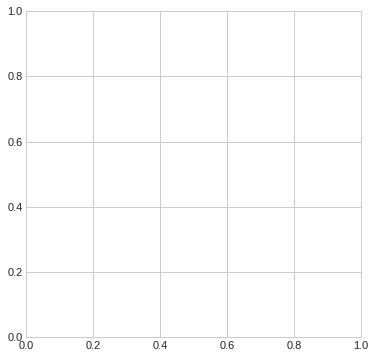

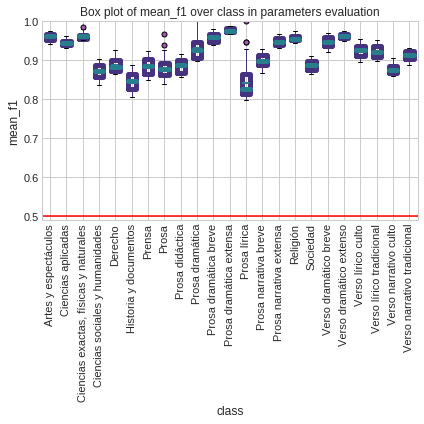

In [41]:
describe_data.boxplots(results_df.groupby(["class"]).head(50), "mean_f1", "class", wdir, "parameters evaluation", rotation = 90, figsize=(6,6), baseline=0.5, ylim= [0.49,1])


In [29]:
results_df.columns.tolist()

['class',
 'mean_f1',
 'mean_rec',
 'mean_prec',
 'f1_macro',
 'f1_micro',
 'baseline',
 'f1-baseline',
 'classifier_name',
 'text_representation',
 'MFW',
 'typography',
 'f1s',
 'test_result_pvalue',
 'labels',
 'sample_size',
 'cv',
 'sampling_times',
 'classifier']

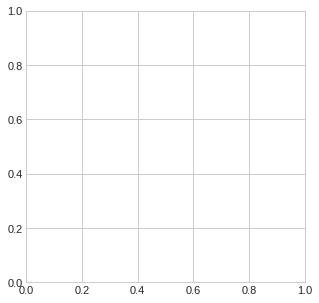

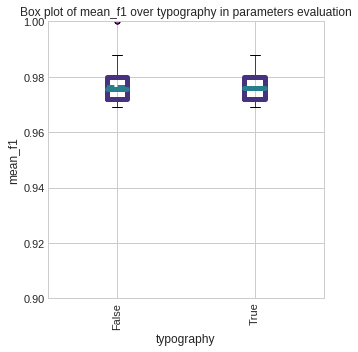

In [55]:
describe_data.boxplots(results_df.groupby(["typography"]).head(50), "mean_f1", "typography", wdir, "parameters evaluation", rotation = 90, figsize=(5,5), baseline=0.5, ylim= [0.9,1])


In [31]:
results_df.groupby(["typography"]).head(50).groupby(["typography"]).mean()

mean_f1  mean_rec  mean_prec  f1_macro  f1_micro  baseline  \
typography                                                               
False       0.97686   0.98374    0.97212   0.97616   0.97628       0.5   
True        0.97600   0.98526    0.96892   0.97474   0.97500       0.5   

            f1-baseline     MFW  test_result_pvalue  sample_size    cv  \
typography                                                               
False           0.47686  3522.0        2.808045e-06       385.88  10.0   
True            0.47600  3500.0        5.646266e-16       381.80  10.0   

            sampling_times  
typography                  
False                  5.0  
True                   5.0

In [32]:
st_tests.test_differences_columns(results_df.groupby(["typography"]).head(50), "typography", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1  value2  pvalue significance
0   False    True   0.492

In [33]:
results_df.groupby(["text_representation"]).head(50).groupby(["text_representation"]).mean()

mean_f1  mean_rec  mean_prec  f1_macro  f1_micro  \
text_representation                                                     
binary               0.97416   0.98356    0.96690   0.97318   0.97332   
log                  0.97626   0.98422    0.97038   0.97532   0.97552   
tfidf                0.94920   0.95172    0.95246   0.94826   0.94916   
zscores              0.95382   0.95790    0.95482   0.95306   0.95354   

                     baseline  f1-baseline     MFW  typography  \
text_representation                                              
binary                    0.5      0.47416  3460.0        0.48   
log                       0.5      0.47626  3600.0        0.48   
tfidf                     0.5      0.44920  3110.0        0.50   
zscores                   0.5      0.45382  4040.0        0.54   

                     test_result_pvalue  sample_size    cv  sampling_times  
text_representation                                                         
binary                     2.808045e-06       457.72  10.0             5.0  
log                        5.299418e-16       431.44  10.0             5.0  
tfidf                      1.773678e-05       532.48  10.0             5.0  
zscores                    6.566202e-19       339.88  10.0             5.0

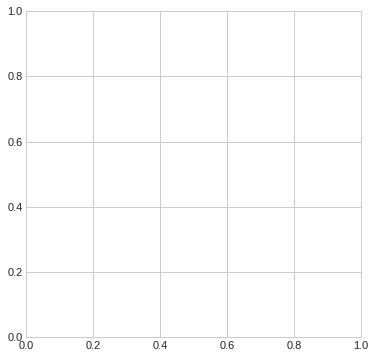

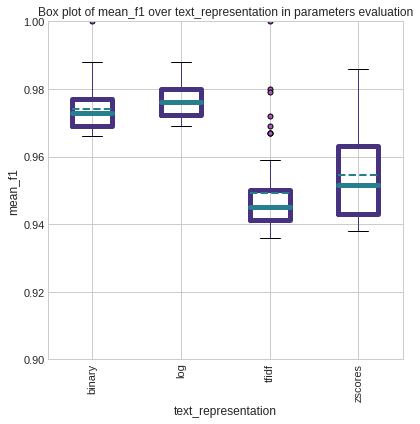

In [50]:
describe_data.boxplots(results_df.groupby(["text_representation"]).head(50), "mean_f1", "text_representation", wdir, "parameters evaluation", rotation = 90, figsize=(6,6), baseline=0.5, ylim= [0.9,1])


In [35]:
st_tests.test_differences_columns(results_df.groupby(["text_representation"]).head(50), "text_representation", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1   value2  pvalue significance
1  binary    tfidf   0.000          ***
2  binary  zscores   0.000          ***
3     log    tfidf   0.000          ***
4     log  zscores   0.000          ***
5   tfidf  zscores   0.077             
0  binary      log   0.085

In [39]:
results_df.groupby(["classifier_name"]).head(50).groupby(["classifier_name"]).median()

mean_f1  mean_rec  mean_prec  f1_macro  f1_micro  baseline  \
classifier_name                                                               
DT                0.9295     0.950     0.9315    0.9265    0.9270       0.5   
LR                0.9705     0.975     0.9685    0.9700    0.9700       0.5   
RF                0.9465     0.950     0.9525    0.9455    0.9460       0.5   
Ridge             0.9680     0.975     0.9660    0.9680    0.9680       0.5   
SVC               0.9720     0.980     0.9690    0.9705    0.9705       0.5   

                 f1-baseline   MFW  typography  test_result_pvalue  \
classifier_name                                                      
DT                    0.4295  3000        True        1.660879e-42   
LR                    0.4705  4000       False        3.837197e-63   
RF                    0.4465  4000        True        1.213867e-51   
Ridge                 0.4680  4000       False        9.403328e-60   
SVC                   0.4720  4000       False        4.253531e-61   

                 sample_size  cv  sampling_times  
classifier_name                                   
DT                       244  10               5  
LR                       244  10               5  
RF                       284  10               5  
Ridge                    244  10               5  
SVC                      244  10               5

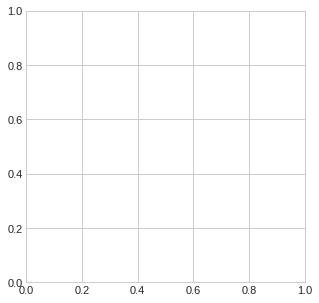

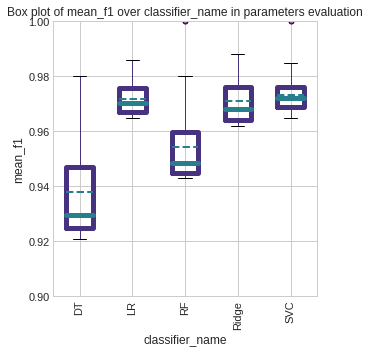

In [48]:
describe_data.boxplots(results_df.groupby(["classifier_name"]).head(50), "mean_f1", "classifier_name", wdir, "parameters evaluation", rotation = 90, figsize=(5,5), baseline=0.5, ylim= [0.9,1], )


In [37]:
st_tests.test_differences_columns(results_df.groupby(["classifier_name"]).head(50), "classifier_name", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1 value2  pvalue significance
0     DT     LR   0.000          ***
1     DT     RF   0.000          ***
2     DT  Ridge   0.000          ***
3     DT    SVC   0.000          ***
4     LR     RF   0.000          ***
7     RF  Ridge   0.000          ***
8     RF    SVC   0.000          ***
9  Ridge    SVC   0.101             
6     LR    SVC   0.195             
5     LR  Ridge   0.583

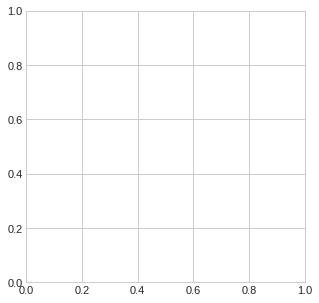

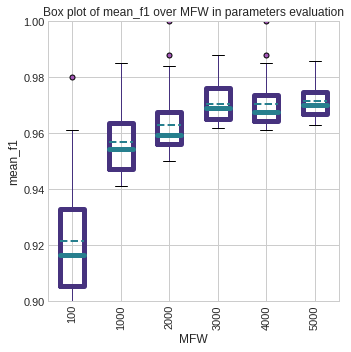

In [59]:
describe_data.boxplots(results_df.groupby(["MFW"]).head(50), "mean_f1", "MFW", wdir, "parameters evaluation", rotation = 90, figsize=(5,5), baseline=0.5, ylim= [0.9,1], )


In [61]:
st_tests.test_differences_columns(results_df.groupby(["MFW"]).head(50), "MFW", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1  value2  pvalue significance
0      100    1000   0.000          ***
1      100    2000   0.000          ***
2      100    3000   0.000          ***
3      100    4000   0.000          ***
4      100    5000   0.000          ***
6     1000    3000   0.000          ***
7     1000    4000   0.000          ***
8     1000    5000   0.000          ***
9     2000    3000   0.000          ***
10    2000    4000   0.000          ***
11    2000    5000   0.000          ***
5     1000    2000   0.006           **
13    3000    5000   0.425             
14    4000    5000   0.465             
12    3000    4000   0.979